# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [1]:
# ![alt](home_credit.png "Home credit")

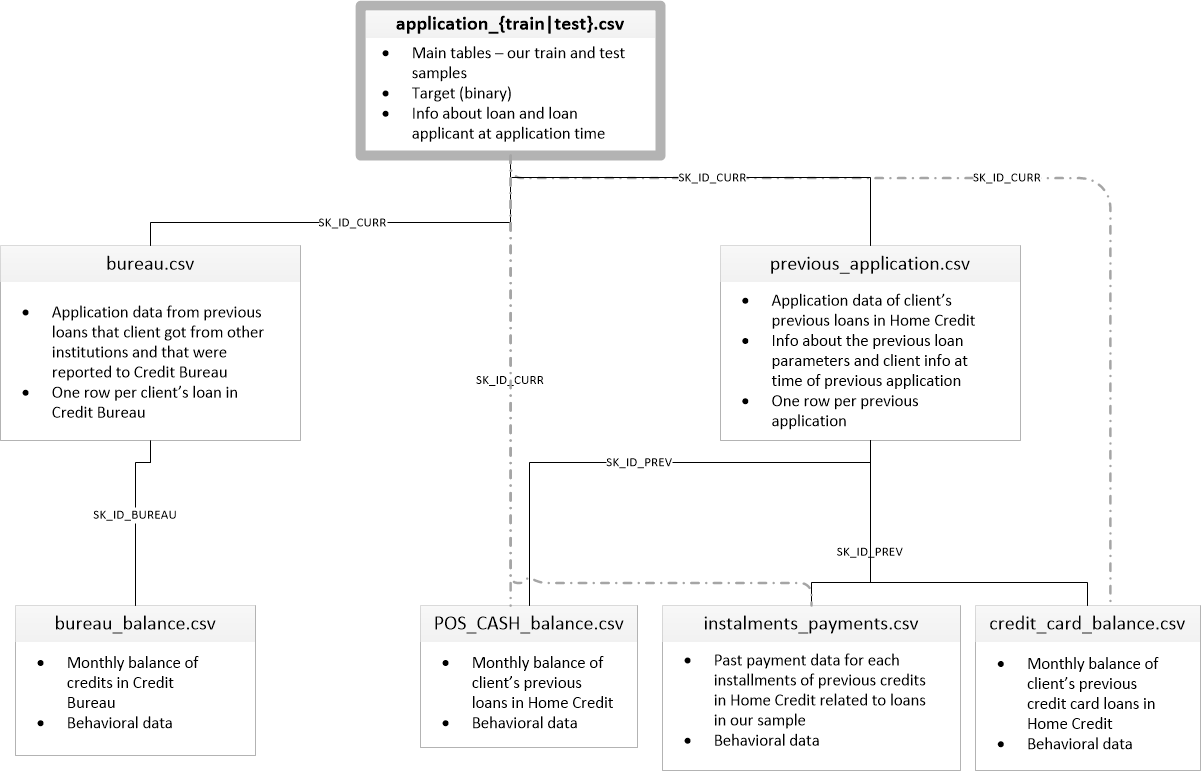

## Downloading the files to local

Create a base directory:

```bash
DATA_DIR = "../Data/"  
```


### Imports

In [2]:
# import packages

import os
import time
import warnings
import zipfile
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import missingno as msno
#pip install msno

warnings.filterwarnings('ignore')


In [3]:
!pwd

/Users/pragatwagle/Desktop/aml hw's/Another Clone/AML556FinalProjectFall2022/Phase2


### Loadig Data

Creating dictionary for datasets so that we can keep track of datsets and also make them callable to functions.

In [4]:
# load data

DATA_DIR =  "/../Data/"

ds_names = ("application_train", "application_test", "bureau","bureau_balance",
            "credit_card_balance", "installments_payments","previous_application",
            "POS_CASH_balance")

datasets = {}
datasets_transformed = {}

for ds_name in ds_names:
    datasets[ds_name] = pd.read_csv(os.getcwd() + DATA_DIR + f'{ds_name}.csv')

In case reading zip files, we can use below code to unzip files are read them.

In [ ]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It is named `HomeCredit_columns_description.csv`

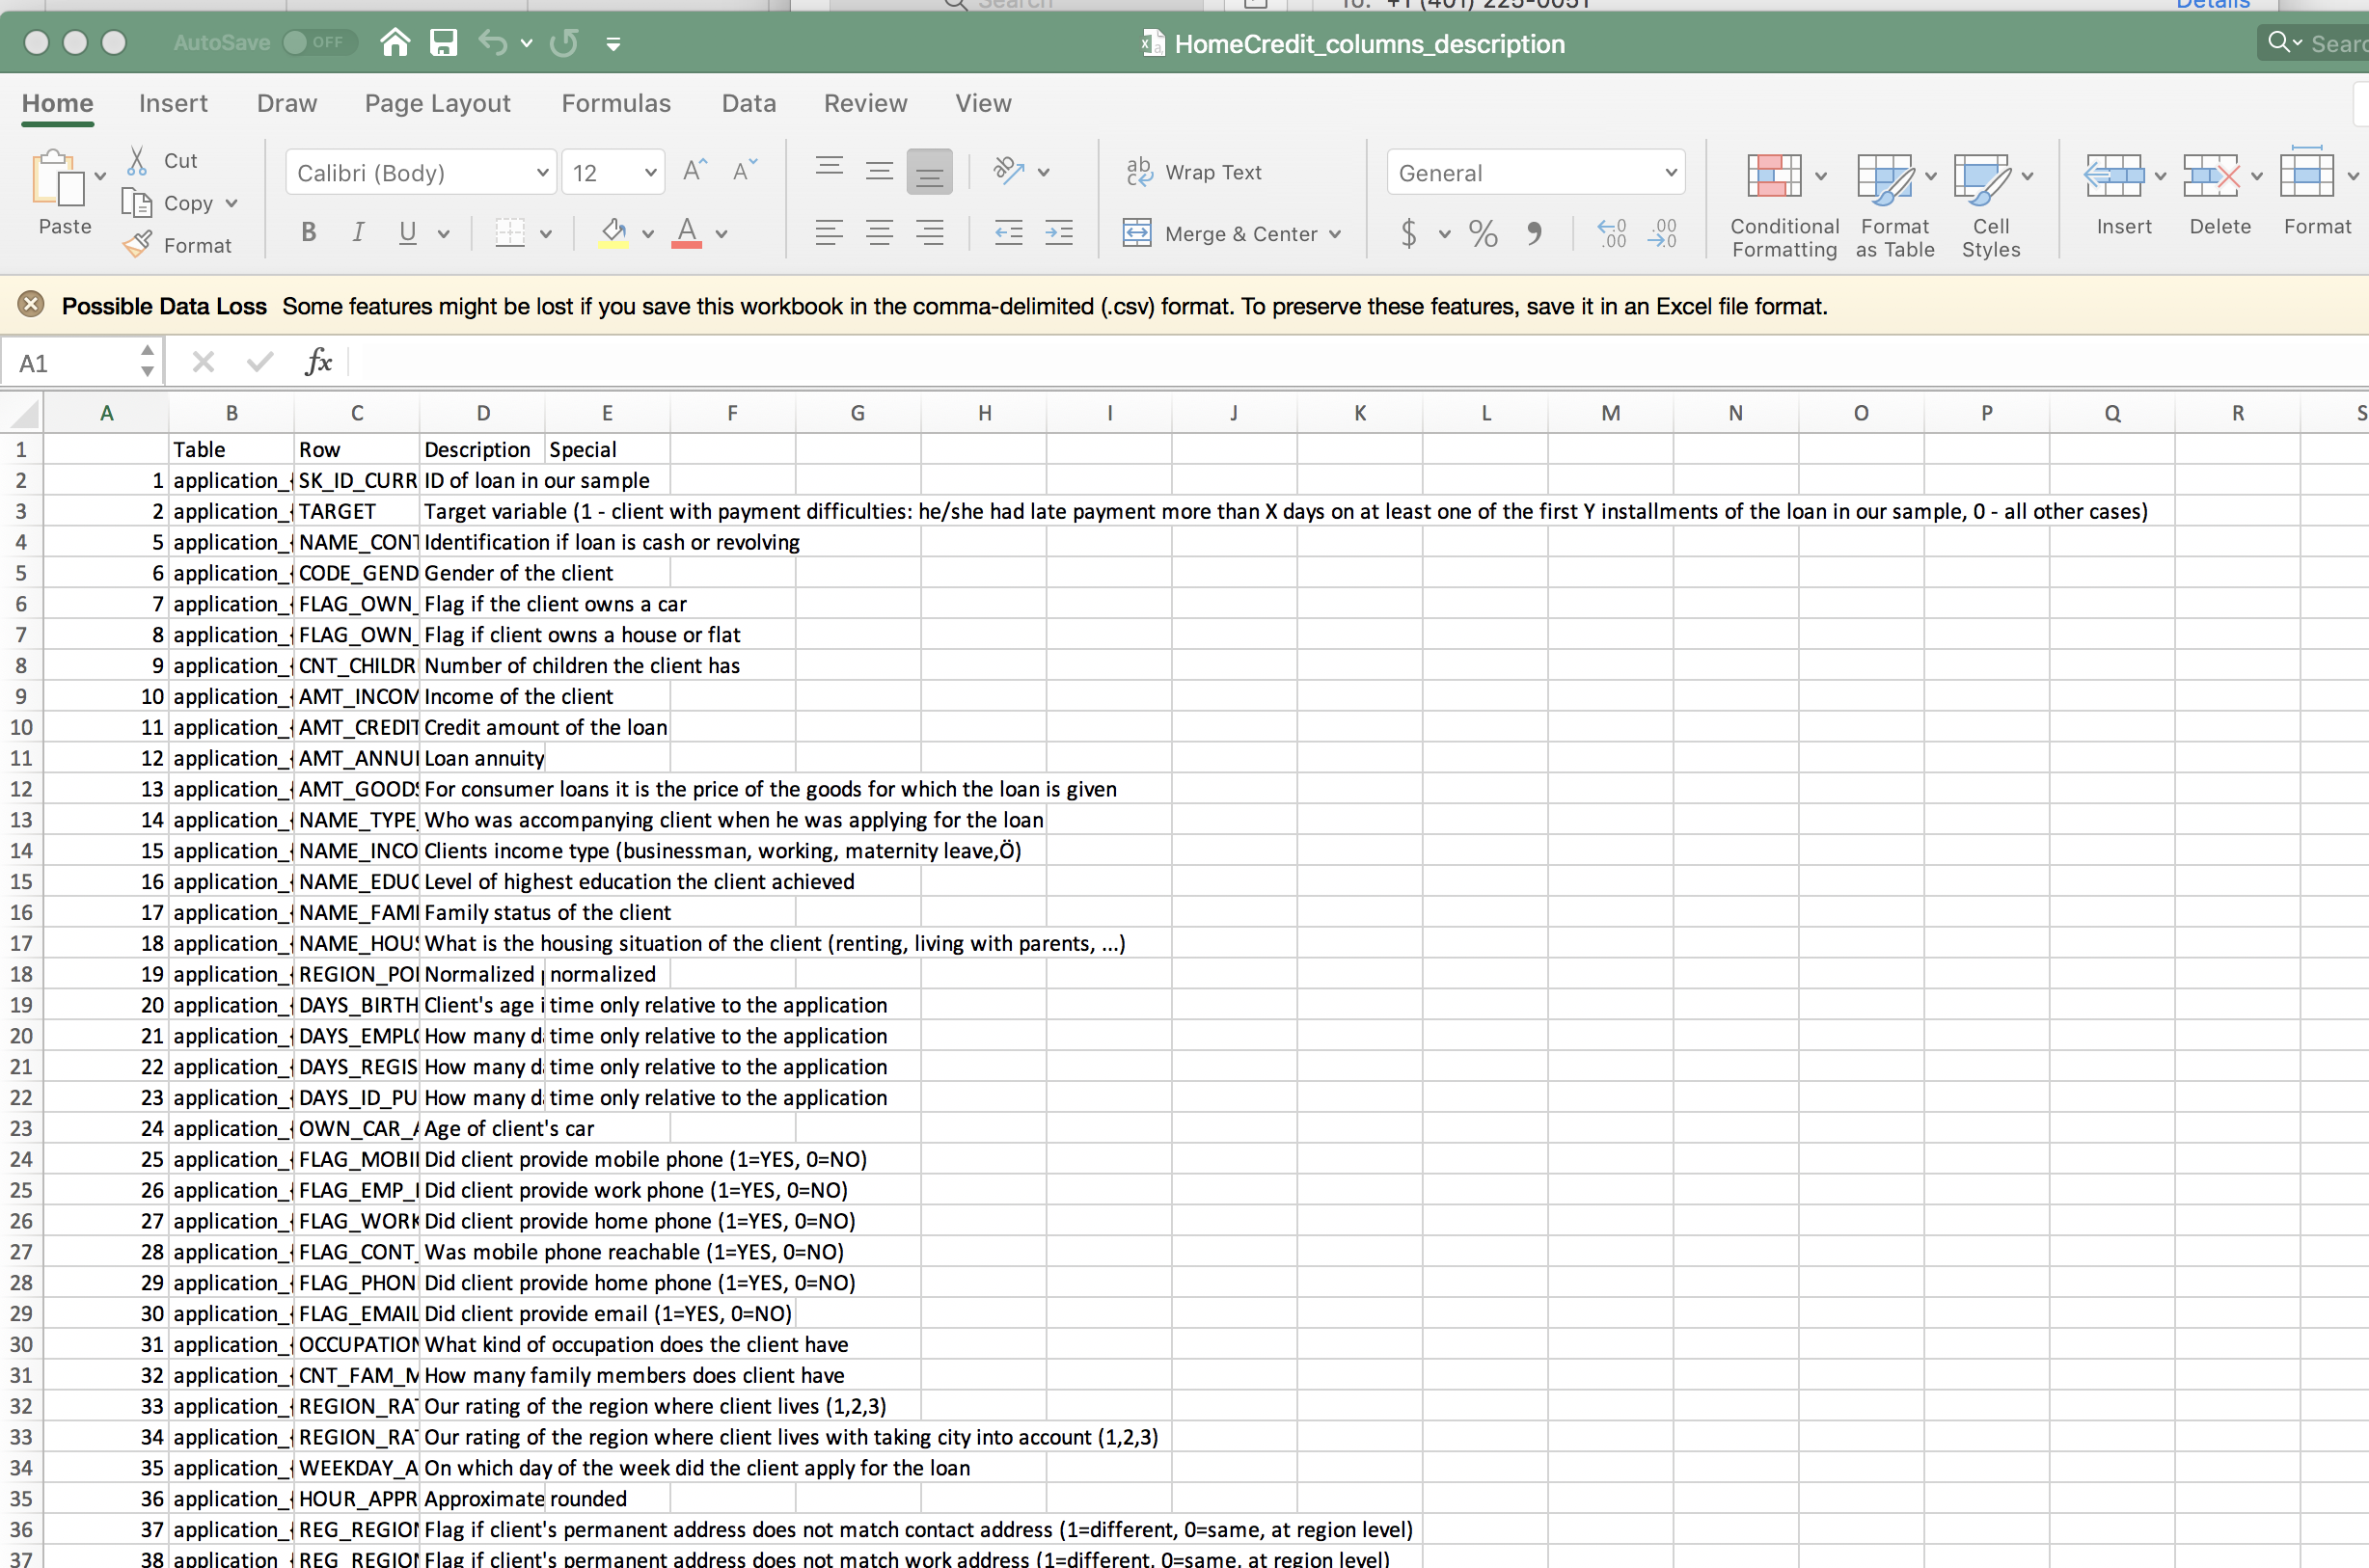

### Application train

In [5]:
def load_data(df,name):
    #df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

ds_name = 'application_train'
datasets[ds_name]= load_data(datasets[ds_name],ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [6]:
ds_name = 'application_test'
datasets[ds_name]= load_data(datasets[ds_name],ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, Income, Family Status, Education, and others.

### The Other Datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about previous credits in bureau. Each row is one month of a previous credit and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application train data. Each current loan in the application train data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan and a single previous loan can have many rows.
* __Credit_card_balance:__ monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [7]:
%%time
ds_names = ("application_train", "application_test", "bureau","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(datasets[ds_name], ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 1.02 s, sys: 86.3 ms, total: 1.1 s
Wall time: 1.11 s


In [8]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## EDA Functions

### Summary Function - All tables

A summary of each table is provided using the described function below. Summary statistics will show statistics on each dataframe and through that meaningful interpretations were made about the data to further plan EDA on each dataset.

__Function Feature Summary:__

This function will take a dataframe as input and provide summary statistics for the table. This generic function will help us evaluate each table with just one line of code, improving the reusablity of the code. 

Function name: feature_summary                                                     Input : Dataframe     Output : Dataframe Summary

Function output:
1. Provide table name for which analysis in progress.
2. Shape - provides rows and columns in the data set.
3. NULLS - Number of nulls in the column.
4. %_NULL - NULL percentage. (nulls/attributes count).
5. Unique values - No of unique values for the feature.
6. Data Type - Id column numerical or categorical.
7. Max/Min - Max and min for the column. This provides idea about scale. helps if need log transformation.
8. Mean - Mean of the attribute.
9. Std - Standard Deviation of the atttibute.
10. Skewness - Skewness, data distribution of transformations.
11. Sample values - Sample values for the attribute.


In [9]:
def feature_summary(df_fa):
    print('DataFrame shape')
    print('Rows:',df_fa.shape[0])
    print('Cols:',df_fa.shape[1])
    print("------------------------------------------------------------------------")
    
    col_list=['Null','%_Null','Unique_Count','Data_type','Max/Min','Mean','Std','Skewness','Sample_values']
    df=pd.DataFrame(index=df_fa.columns,columns=col_list)
    df['Null']=list([len(df_fa[col][df_fa[col].isnull()]) for i,col in enumerate(df_fa.columns)])
    df['%_Null']=round((df_fa.isnull().sum()/df_fa.isnull().count()*100),3).sort_values(ascending = False)
    df['Unique_Count']=list([len(df_fa[col].unique()) for i,col in enumerate(df_fa.columns)])
    df['Data_type']=list([df_fa[col].dtype for i,col in enumerate(df_fa.columns)])
    for i,col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col,'Max/Min']=str(round(df_fa[col].max(),2))+'/'+str(round(df_fa[col].min(),2))
            df.at[col,'Mean']=df_fa[col].mean()
            df.at[col,'Std']=df_fa[col].std()
            df.at[col,'Skewness']=df_fa[col].skew()
        df.at[col,'Sample_values']=list(df_fa[col].unique())
    print("Table Statistics")
    print("------------------------------------------------------------------------")
    display(df.fillna('-'))

In [10]:
for i,ds_name in enumerate(datasets.keys()):
    print("Table under consideration:",ds_name.upper())
    print("------------------------------------------------------------------------")
    ds = feature_summary(datasets[ds_name])
    print("------------------------------------------------------------------------")

Table under consideration: APPLICATION_TRAIN
------------------------------------------------------------------------
DataFrame shape
Rows: 307511
Cols: 122
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_CURR                      0   0.000        307511     int64   
TARGET                          0   0.000             2     int64   
NAME_CONTRACT_TYPE              0   0.000             2    object   
CODE_GENDER                     0   0.000             3    object   
FLAG_OWN_CAR                    0   0.000             2    object   
...                           ...     ...           ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   41519  13.502            10   float64   
AMT_REQ_CREDIT_BUREAU_WEEK  41519  13.502            10   float64   
AMT_REQ_CREDIT_BUREAU_MON   41519  13.502            25   float64   
AMT_REQ_CREDIT_BUREAU_QRT   41519  13.502            12   float64   
AMT_REQ_CREDIT_BUREAU_YEAR  41519  13.502            26   float64   

                                  Max/Min           Mean            Std  \
SK_ID_CURR                  456255/100002  278180.518577  102790.175348   
TARGET                                1/0       0.080729       0.272419   
NAME_CONTRACT_TYPE                      -              -              -   
CODE_GENDER                             -              -              -   
FLAG_OWN_CAR                            -              -              -   
...                                   ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY         9.0/0.0          0.007       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK        8.0/0.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON        27.0/0.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT       261.0/0.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR       25.0/0.0       1.899974       1.869295   

                              Skewness  \
SK_ID_CURR                     -0.0012   
TARGET                        3.078159   
NAME_CONTRACT_TYPE                   -   
CODE_GENDER                          -   
FLAG_OWN_CAR                         -   
...                                ...   
AMT_REQ_CREDIT_BUREAU_DAY    27.043505   
AMT_REQ_CREDIT_BUREAU_WEEK    9.293573   
AMT_REQ_CREDIT_BUREAU_MON     7.804848   
AMT_REQ_CREDIT_BUREAU_QRT   134.365776   
AMT_REQ_CREDIT_BUREAU_YEAR     1.24359   

                                                                Sample_values  
SK_ID_CURR                  [100002, 100003, 100004, 100006, 100007, 10000...  
TARGET                                                                 [1, 0]  
NAME_CONTRACT_TYPE                              [Cash loans, Revolving loans]  
CODE_GENDER                                                       [M, F, XNA]  
FLAG_OWN_CAR                                                           [N, Y]  
...                                                                       ...  
AMT_REQ_CREDIT_BUREAU_DAY   [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ...  
AMT_REQ_CREDIT_BUREAU_WEEK  [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ...  
AMT_REQ_CREDIT_BUREAU_MON   [0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ...  
AMT_REQ_CREDIT_BUREAU_QRT   [0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ...  
AMT_REQ_CREDIT_BUREAU_YEAR  [1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ...  

[122 rows x 9 columns]

------------------------------------------------------------------------
Table under consideration: APPLICATION_TEST
------------------------------------------------------------------------
DataFrame shape
Rows: 48744
Cols: 121
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_CURR                     0    0.00         48744     int64   
NAME_CONTRACT_TYPE             0    0.00             2    object   
CODE_GENDER                    0    0.00             2    object   
FLAG_OWN_CAR                   0    0.00             2    object   
FLAG_OWN_REALTY                0    0.00             2    object   
...                          ...     ...           ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   6049   12.41             4   float64   
AMT_REQ_CREDIT_BUREAU_WEEK  6049   12.41             4   float64   
AMT_REQ_CREDIT_BUREAU_MON   6049   12.41             8   float64   
AMT_REQ_CREDIT_BUREAU_QRT   6049   12.41             9   float64   
AMT_REQ_CREDIT_BUREAU_YEAR  6049   12.41            17   float64   

                                  Max/Min          Mean            Std  \
SK_ID_CURR                  456250/100001  277796.67635  103169.547296   
NAME_CONTRACT_TYPE                      -             -              -   
CODE_GENDER                             -             -              -   
FLAG_OWN_CAR                            -             -              -   
FLAG_OWN_REALTY                         -             -              -   
...                                   ...           ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY         2.0/0.0      0.001803       0.046132   
AMT_REQ_CREDIT_BUREAU_WEEK        2.0/0.0      0.002787       0.054037   
AMT_REQ_CREDIT_BUREAU_MON         6.0/0.0      0.009299       0.110924   
AMT_REQ_CREDIT_BUREAU_QRT         7.0/0.0      0.546902       0.693305   
AMT_REQ_CREDIT_BUREAU_YEAR       17.0/0.0      1.983769       1.838873   

                             Skewness  \
SK_ID_CURR                    0.00756   
NAME_CONTRACT_TYPE                  -   
CODE_GENDER                         -   
FLAG_OWN_CAR                        -   
FLAG_OWN_REALTY                     -   
...                               ...   
AMT_REQ_CREDIT_BUREAU_DAY   28.273838   
AMT_REQ_CREDIT_BUREAU_WEEK  20.182271   
AMT_REQ_CREDIT_BUREAU_MON   17.270891   
AMT_REQ_CREDIT_BUREAU_QRT    1.254612   
AMT_REQ_CREDIT_BUREAU_YEAR   1.065424   

                                                                Sample_values  
SK_ID_CURR                  [100001, 100005, 100013, 100028, 100038, 10004...  
NAME_CONTRACT_TYPE                              [Cash loans, Revolving loans]  
CODE_GENDER                                                            [F, M]  
FLAG_OWN_CAR                                                           [N, Y]  
FLAG_OWN_REALTY                                                        [Y, N]  
...                                                                       ...  
AMT_REQ_CREDIT_BUREAU_DAY                                [0.0, nan, 1.0, 2.0]  
AMT_REQ_CREDIT_BUREAU_WEEK                               [0.0, nan, 1.0, 2.0]  
AMT_REQ_CREDIT_BUREAU_MON            [0.0, nan, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0]  
AMT_REQ_CREDIT_BUREAU_QRT       [0.0, 1.0, nan, 3.0, 2.0, 4.0, 5.0, 7.0, 6.0]  
AMT_REQ_CREDIT_BUREAU_YEAR  [0.0, 3.0, 4.0, nan, 2.0, 1.0, 5.0, 6.0, 7.0, ...  

[121 rows x 9 columns]

------------------------------------------------------------------------
Table under consideration: BUREAU
------------------------------------------------------------------------
DataFrame shape
Rows: 1716428
Cols: 17
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_CURR                    0   0.000        305811     int64   
SK_ID_BUREAU                  0   0.000       1716428     int64   
CREDIT_ACTIVE                 0   0.000             4    object   
CREDIT_CURRENCY               0   0.000             4    object   
DAYS_CREDIT                   0   0.000          2923     int64   
CREDIT_DAY_OVERDUE            0   0.000           942     int64   
DAYS_CREDIT_ENDDATE      105553   6.150         14097   float64   
DAYS_ENDDATE_FACT        633653  36.917          2918   float64   
AMT_CREDIT_MAX_OVERDUE  1124488  65.513         68252   float64   
CNT_CREDIT_PROLONG            0   0.000            10     int64   
AMT_CREDIT_SUM               13   0.001        236709   float64   
AMT_CREDIT_SUM_DEBT      257669  15.012        226538   float64   
AMT_CREDIT_SUM_LIMIT     591780  34.477         51727   float64   
AMT_CREDIT_SUM_OVERDUE        0   0.000          1616   float64   
CREDIT_TYPE                   0   0.000            15    object   
DAYS_CREDIT_UPDATE            0   0.000          2982     int64   
AMT_ANNUITY             1226791  71.473         40322   float64   

                                        Max/Min            Mean  \
SK_ID_CURR                        456255/100001   278214.933645   
SK_ID_BUREAU                    6843457/5000000  5924434.489032   
CREDIT_ACTIVE                                 -               -   
CREDIT_CURRENCY                               -               -   
DAYS_CREDIT                             0/-2922    -1142.107685   
CREDIT_DAY_OVERDUE                       2792/0        0.818167   
DAYS_CREDIT_ENDDATE            31199.0/-42060.0      510.517362   
DAYS_ENDDATE_FACT                  0.0/-42023.0    -1017.437148   
AMT_CREDIT_MAX_OVERDUE          115987185.0/0.0     3825.417661   
CNT_CREDIT_PROLONG                          9/0         0.00641   
AMT_CREDIT_SUM                  585000000.0/0.0   354994.591918   
AMT_CREDIT_SUM_DEBT     170100000.0/-4705600.32   137085.119952   
AMT_CREDIT_SUM_LIMIT      4705600.32/-586406.11      6229.51498   
AMT_CREDIT_SUM_OVERDUE            3756681.0/0.0       37.912758   
CREDIT_TYPE                                   -               -   
DAYS_CREDIT_UPDATE                   372/-41947      -593.74832   
AMT_ANNUITY                     118453423.5/0.0      15712.7577   

                                  Std    Skewness  \
SK_ID_CURR              102938.558112    0.001063   
SK_ID_BUREAU            532265.728552   -0.007498   
CREDIT_ACTIVE                       -           -   
CREDIT_CURRENCY                     -           -   
DAYS_CREDIT                795.164928   -0.582349   
CREDIT_DAY_OVERDUE          36.544428   55.931005   
DAYS_CREDIT_ENDDATE       4994.219837    5.127134   
DAYS_ENDDATE_FACT          714.010626   -0.774754   
AMT_CREDIT_MAX_OVERDUE  206031.606207  470.913819   
CNT_CREDIT_PROLONG           0.096224   20.319277   
AMT_CREDIT_SUM          1149811.34398  124.586097   
AMT_CREDIT_SUM_DEBT     677401.130952   36.414538   
AMT_CREDIT_SUM_LIMIT     45032.031476   18.026914   
AMT_CREDIT_SUM_OVERDUE    5937.650035  403.241858   
CREDIT_TYPE                         -           -   
DAYS_CREDIT_UPDATE         720.747312  -11.334995   
AMT_ANNUITY             325826.949053  212.543125   

                                                            Sample_values  
SK_ID_CURR              [215354, 162297, 402440, 238881, 222183, 42615...  
SK_ID_BUREAU            [5714462, 5714463, 5714464, 5714465, 5714466, ...  
CREDIT_ACTIVE                            [Closed, Active, Sold, Bad debt]  
CREDIT_CURRENCY          [currency 1, currency 2, currency 4, currency 3]  
DAYS_CREDIT             [-497, -208, -203, -629, -273, -43, -1896, -11...  
CREDIT_DAY_OVERDUE      [0, 2603, 6, 30, 2156, 496, 186, 2264, 41, 8, ...  
DAYS_CREDIT_ENDDATE     [-153.0, 1075.0, 528.0, nan, 1197.0, 27460.0, ...  
DAYS_ENDDATE_FACT       [-153.0, nan, -1710.0, -84

------------------------------------------------------------------------
Table under consideration: BUREAU_BALANCE
------------------------------------------------------------------------
DataFrame shape
Rows: 27299925
Cols: 3
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type          Max/Min  \
SK_ID_BUREAU       0     0.0        817395     int64  6842888/5001709   
MONTHS_BALANCE     0     0.0            97     int64            0/-96   
STATUS             0     0.0             8    object                -   

                          Mean            Std  Skewness  \
SK_ID_BUREAU    6036297.332974  492348.856904 -0.372188   
MONTHS_BALANCE      -30.741687      23.864509  -0.76069   
STATUS                       -              -         -   

                                                    Sample_values  
SK_ID_BUREAU    [5715448, 5715449, 5715451, 5715452, 5715453, ...  
MONTHS_BALANCE  [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -...  
STATUS                                   [C, 0, X, 1, 2, 3, 5, 4]

------------------------------------------------------------------------
Table under consideration: CREDIT_CARD_BALANCE
------------------------------------------------------------------------
DataFrame shape
Rows: 3840312
Cols: 23
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_PREV                       0   0.000        104307     int64   
SK_ID_CURR                       0   0.000        103558     int64   
MONTHS_BALANCE                   0   0.000            96     int64   
AMT_BALANCE                      0   0.000       1347904   float64   
AMT_CREDIT_LIMIT_ACTUAL          0   0.000           181     int64   
AMT_DRAWINGS_ATM_CURRENT    749816  19.525          2268   float64   
AMT_DRAWINGS_CURRENT             0   0.000        187005   float64   
AMT_DRAWINGS_OTHER_CURRENT  749816  19.525          1833   float64   
AMT_DRAWINGS_POS_CURRENT    749816  19.525        168749   float64   
AMT_INST_MIN_REGULARITY     305236   7.948        312267   float64   
AMT_PAYMENT_CURRENT         767988  19.998        163210   float64   
AMT_PAYMENT_TOTAL_CURRENT        0   0.000        182957   float64   
AMT_RECEIVABLE_PRINCIPAL         0   0.000       1195839   float64   
AMT_RECIVABLE                    0   0.000       1338878   float64   
AMT_TOTAL_RECEIVABLE             0   0.000       1339008   float64   
CNT_DRAWINGS_ATM_CURRENT    749816  19.525            45   float64   
CNT_DRAWINGS_CURRENT             0   0.000           129     int64   
CNT_DRAWINGS_OTHER_CURRENT  749816  19.525            12   float64   
CNT_DRAWINGS_POS_CURRENT    749816  19.525           134   float64   
CNT_INSTALMENT_MATURE_CUM   305236   7.948           122   float64   
NAME_CONTRACT_STATUS             0   0.000             7    object   
SK_DPD                           0   0.000           917     int64   
SK_DPD_DEF                       0   0.000           378     int64   

                                          Max/Min           Mean  \
SK_ID_PREV                        2843496/1000018   1904503.5899   
SK_ID_CURR                          456250/100006  278324.207289   
MONTHS_BALANCE                             -1/-96     -34.521921   
AMT_BALANCE                 1505902.19/-420250.18   58300.155262   
AMT_CREDIT_LIMIT_ACTUAL                 1350000/0    153807.9574   
AMT_DRAWINGS_ATM_CURRENT       2115000.0/-6827.31    5961.324822   
AMT_DRAWINGS_CURRENT          2287098.31/-6211.62    7433.388179   
AMT_DRAWINGS_OTHER_CURRENT          1529847.0/0.0     288.169582   
AMT_DRAWINGS_POS_CURRENT           2239274.16/0.0    2968.804848   
AMT_INST_MIN_REGULARITY             202882.01/0.0    3540.204129   
AMT_PAYMENT_CURRENT                4289207.45/0.0   10280.537702   
AMT_PAYMENT_TOTAL_CURRENT          4278315.69/0.0    7588.856739   
AMT_RECEIVABLE_PRINCIPAL    1472316.79/-423305.82   55965.876905   
AMT_RECIVABLE               1493338.19/-420250.18   58088.811177   
AMT_TOTAL_RECEIVABLE        1493338.19/-420250.18   58098.285489   
CNT_DRAWINGS_ATM_CURRENT                 51.0/0.0       0.309449   
CNT_DRAWINGS_CURRENT                        165/0       0.703144   
CNT_DRAWINGS_OTHER_CURRENT               12.0/0.0       0.004812   
CNT_DRAWINGS_POS_CURRENT                165.0/0.0       0.559479   
CNT_INSTALMENT_MATURE_CUM               120.0/0.0      20.825084   
NAME_CONTRACT_STATUS                            -              -   
SK_DPD                                     3260/0       9.283667   
SK_DPD_DEF                                 3260/0       0.331622   

                                      Std   Skewness  \
SK_ID_PREV                  536469.470563   0.038385   
SK_ID_CURR                  102704.475133  -0.001834   
MONTHS_BALANCE                  26.667751   -0.59804   
AMT_BALANCE                 106307.031025   2.920173   
AMT_CREDIT_LIMIT_ACTUAL     165145.699523   2.059732   
AMT_DRAWINGS_ATM_CURRENT     28225.688579   9.664842   
AMT_DRAWINGS_CURRENT         33846.077334  10.065626   
AMT_DRAWINGS_OTHER_CURRENT    8201.989345   50.57035   
AMT_DRAWINGS_POS_CURRENT     20796.887047  19.421081   
AMT_INST_MIN_REGULARITY       5600.154122   2.494431   
AMT_PAYMENT_CURRENT          36078.084953  12.990581   
AMT_PAYMENT_TOTAL_CURRENT    32005.987768  1

------------------------------------------------------------------------
Table under consideration: INSTALLMENTS_PAYMENTS
------------------------------------------------------------------------
DataFrame shape
Rows: 13605401
Cols: 8
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type          Max/Min  \
SK_ID_PREV                 0   0.000        997752     int64  2843499/1000001   
SK_ID_CURR                 0   0.000        339587     int64    456255/100001   
NUM_INSTALMENT_VERSION     0   0.000            65   float64        178.0/0.0   
NUM_INSTALMENT_NUMBER      0   0.000           277     int64            277/1   
DAYS_INSTALMENT            0   0.000          2922   float64     -1.0/-2922.0   
DAYS_ENTRY_PAYMENT      2905   0.021          3040   float64     -1.0/-4921.0   
AMT_INSTALMENT             0   0.000        902539   float64   3771487.85/0.0   
AMT_PAYMENT             2905   0.021        944236   float64   3771487.85/0.0   

                                Mean            Std   Skewness  \
SK_ID_PREV              1.903365e+06  536202.905546   0.042510   
SK_ID_CURR              2.784449e+05  102718.310411  -0.003354   
NUM_INSTALMENT_VERSION  8.566373e-01       1.035216   9.593395   
NUM_INSTALMENT_NUMBER   1.887090e+01      26.664067   2.497597   
DAYS_INSTALMENT        -1.042270e+03     800.946284  -0.628704   
DAYS_ENTRY_PAYMENT     -1.051114e+03     800.585883  -0.626889   
AMT_INSTALMENT          1.705091e+04   50570.254429  16.235905   
AMT_PAYMENT             1.723822e+04   54735.783981  14.951925   

                                                            Sample_values  
SK_ID_PREV              [1054186, 1330831, 2085231, 2452527, 2714724, ...  
SK_ID_CURR              [161674, 151639, 193053, 199697, 167756, 16448...  
NUM_INSTALMENT_VERSION  [1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, ...  
NUM_INSTALMENT_NUMBER   [6, 34, 1, 3, 2, 12, 11, 4, 14, 8, 20, 56, 7, ...  
DAYS_INSTALMENT         [-1180.0, -2156.0, -63.0, -2418.0, -1383.0, -1...  
DAYS_ENTRY_PAYMENT      [-1187.0, -2156.0, -63.0, -2426.0, -1366.0, -1...  
AMT_INSTALMENT          [6948.36, 1716.525, 25425.0, 24350.13, 2165.04...  
AMT_PAYMENT             [6948.36, 1716.525, 25425.0, 24350.13, 2160.58...

------------------------------------------------------------------------
Table under consideration: PREVIOUS_APPLICATION
------------------------------------------------------------------------
DataFrame shape
Rows: 1670214
Cols: 37
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_PREV                         0   0.000       1670214     int64   
SK_ID_CURR                         0   0.000        338857     int64   
NAME_CONTRACT_TYPE                 0   0.000             4    object   
AMT_ANNUITY                   372235  22.287        357960   float64   
AMT_APPLICATION                    0   0.000         93885   float64   
AMT_CREDIT                         1   0.000         86804   float64   
AMT_DOWN_PAYMENT              895844  53.636         29279   float64   
AMT_GOODS_PRICE               385515  23.082         93886   float64   
WEEKDAY_APPR_PROCESS_START         0   0.000             7    object   
HOUR_APPR_PROCESS_START            0   0.000            24     int64   
FLAG_LAST_APPL_PER_CONTRACT        0   0.000             2    object   
NFLAG_LAST_APPL_IN_DAY             0   0.000             2     int64   
RATE_DOWN_PAYMENT             895844  53.636        207034   float64   
RATE_INTEREST_PRIMARY        1664263  99.644           149   float64   
RATE_INTEREST_PRIVILEGED     1664263  99.644            26   float64   
NAME_CASH_LOAN_PURPOSE             0   0.000            25    object   
NAME_CONTRACT_STATUS               0   0.000             4    object   
DAYS_DECISION                      0   0.000          2922     int64   
NAME_PAYMENT_TYPE                  0   0.000             4    object   
CODE_REJECT_REASON                 0   0.000             9    object   
NAME_TYPE_SUITE               820405  49.120             8    object   
NAME_CLIENT_TYPE                   0   0.000             4    object   
NAME_GOODS_CATEGORY                0   0.000            28    object   
NAME_PORTFOLIO                     0   0.000             5    object   
NAME_PRODUCT_TYPE                  0   0.000             3    object   
CHANNEL_TYPE                       0   0.000             8    object   
SELLERPLACE_AREA                   0   0.000          2097     int64   
NAME_SELLER_INDUSTRY               0   0.000            11    object   
CNT_PAYMENT                   372230  22.286            50   float64   
NAME_YIELD_GROUP                   0   0.000             5    object   
PRODUCT_COMBINATION              346   0.021            18    object   
DAYS_FIRST_DRAWING            673065  40.298          2839   float64   
DAYS_FIRST_DUE                673065  40.298          2893   float64   
DAYS_LAST_DUE_1ST_VERSION     673065  40.298          4606   float64   
DAYS_LAST_DUE                 673065  40.298          2874   float64   
DAYS_TERMINATION              673065  40.298          2831   float64   
NFLAG_INSURED_ON_APPROVAL     673065  40.298             3   float64   

                                      Max/Min            Mean            Std  \
SK_ID_PREV                    2845382/1000001  1923089.135331  532597.958696   
SK_ID_CURR                      456255/100001   278357.174099  102814.823849   
NAME_CONTRACT_TYPE                          -               -              -   
AMT_ANNUITY                     418058.15/0.0    15955.120659   14782.137335   
AMT_APPLICATION                 6905160.0/0.0    175233.86036  292779.762387   
AMT_CREDIT                      6905160.0/0.0   196114.021218  318574.616546   
AMT_DOWN_PAYMENT               3060045.0/-0.9     6697.402139    20921.49541   
AMT_GOODS_PRICE                 6905160.0/0.0   227847.279283  315396.557937   
WEEKDAY_APPR_PROCESS_START                  -               -              -   
HOUR_APPR_PROCESS_START                  23/0       12.484182       3.334028   
FLAG_LAST_APPL_PER_CONTRACT                 -               -              -   
NFLAG_LAST_APPL_IN_DAY                    1/0        0.996468        0.05933   
RATE_DOWN_PAYMENT                    1.0/-0.0        0.079637       0.107823   
RATE_INTEREST_PRIMARY                1.0/0.03        0.188357       0.087671   
RATE_INTEREST_PRIVILEGED             1.0/0.37        0.773503       0.100879   
NAME_CASH_LOAN_

------------------------------------------------------------------------
Table under consideration: POS_CASH_BALANCE
------------------------------------------------------------------------
DataFrame shape
Rows: 10001358
Cols: 8
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type          Max/Min  \
SK_ID_PREV                 0   0.000        936325     int64  2843499/1000001   
SK_ID_CURR                 0   0.000        337252     int64    456255/100001   
MONTHS_BALANCE             0   0.000            96     int64           -1/-96   
CNT_INSTALMENT         26071   0.261            74   float64         92.0/1.0   
CNT_INSTALMENT_FUTURE  26087   0.261            80   float64         85.0/0.0   
NAME_CONTRACT_STATUS       0   0.000             9    object                -   
SK_DPD                     0   0.000          3400     int64           4231/0   
SK_DPD_DEF                 0   0.000          2307     int64           3595/0   

                                 Mean            Std   Skewness  \
SK_ID_PREV             1903216.598957  535846.530722   0.044229   
SK_ID_CURR              278403.863306   102763.74509  -0.003128   
MONTHS_BALANCE             -35.012588       26.06657  -0.672777   
CNT_INSTALMENT               17.08965      11.995056   1.601734   
CNT_INSTALMENT_FUTURE        10.48384      11.109058   1.846746   
NAME_CONTRACT_STATUS                -              -          -   
SK_DPD                      11.606928     132.714043  14.899126   
SK_DPD_DEF                   0.654468      32.762491  66.339906   

                                                           Sample_values  
SK_ID_PREV             [1803195, 1715348, 1784872, 1903291, 2341044, ...  
SK_ID_CURR             [182943, 367990, 397406, 269225, 334279, 34216...  
MONTHS_BALANCE         [-31, -33, -32, -35, -38, -39, -34, -41, -37, ...  
CNT_INSTALMENT         [48.0, 36.0, 12.0, 24.0, 60.0, 18.0, 4.0, 42.0...  
CNT_INSTALMENT_FUTURE  [45.0, 35.0, 9.0, 42.0, 12.0, 43.0, 36.0, 16.0...  
NAME_CONTRACT_STATUS   [Active, Completed, Signed, Approved, Returned...  
SK_DPD                 [0, 1, 2, 4, 3, 18, 7, 5, 12, 6, 8, 13, 16, 10...  
SK_DPD_DEF             [0, 1, 2, 4, 3, 18, 7, 5, 12, 8, 13, 10, 15, 6...

------------------------------------------------------------------------


### Feature extraction based on Type


__Function id_num_cat_feature:__

This function will take a dataframe as input and return 4 lists that contain ID columns, numerical features, categorical features, and numerical features without the ID cols. 

Function name: id_num_cat_feature
Input : Dataframe
Output : 4 Lists

Function output:
1. ID columns
2. Numerical features
3. Categorical features
4. Numerical features excluding the ID columns.


Using this function gives us mutiple lists of the column types which are then used in other functions. The function returns clear separations on what columns are categorical and numerical. By having the distinctive categorical columns and numerical columns lists, different transformations are performed on them based on if they are categorical or numerical.

In [11]:
def id_num_cat_feature(df,text = True):
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    categorical = df.select_dtypes(include=['object', 'bool']).columns
    feat_num = list(numerical)
    feat_cat = list(categorical)
    
    id_cols = ['SK_ID_CURR','SK_ID_BUREAU']
    
    id_cols = [cols for cols in  list(df.columns.intersection(id_cols))] 
    features = list(set(df.columns) - set(id_cols))

    if text == True:
          # print eda
        print('--------')
        print(f"# of ID's: {len(id_cols)}")
        print(f" ID's:")
        print(id_cols)
        print('')
        print('--------')
        print(f"# All features: {len(features)}")
        print(f"All features:")
        print(features)
        print('')
        print(f"Missing data:")
        print(missing_data(df[features]))
        print('')
        print('--------')
        print(f"# of Numerical features: {len(feat_num)}")
        print(f"Numerical features:")
        print(feat_num)
        print('')
        print(f"Numerical Statistical Summary:")
        print('')
        print(df[feat_num].describe())
        print('')
        print('--------')
        print(f"# of Categorical features: {len(feat_cat)}")
        print(f"Categorical features:")
        print(feat_cat)
        print('')
        print(f"Categorical Statistical Summary:")
        print('')
        #print(df[feat_cat].describe(include='all'))
        print('')
        print("Categories:")
        print('')
        print(df[feat_cat].apply(lambda col: col.unique()))
        print('')
        print('--------')
    return id_cols,feat_num,feat_cat,features

### Missing Count and percentage


__Function missing_data:__

This function will take a dataframe as input and provide null count and % of nulls for a dataframe.

Function name: missing_data
Input : Dataframe
Output : NULL count and NULL %

Function output:
1. NULL Count
2. NULL Percentage.

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

### Feature Engineering 

__Class:__ FeatureSummarizer


Class FeatureSummarizer has following aggregation parameters:
1. "min"
2. "max"
3. "count"
4. "sum"
5. "median"
6. "mean"
7. "var"

Based on the keys of the dataframe, transformation function will enable grouping of feature variables on ID and then aggregate the feature variables into their predefined statistical summaries for each grouping.

__Function:__ runFeatureSummarizer

This function will take dataframe and features as input and using the class above, get aggregated features. The output of the above function will be the transformed aggregated features for the dataframe passed into the function argument.

In [13]:
class FeatureSummarizer(BaseEstimator, TransformerMixin):
    def __init__(self, reset_index, features = None):
        self.features = features
        self.agg_ops = ["min", "max", "count", "sum", "median", "mean", "var"]
        self.reset_index = reset_index
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        keys = list(set(X.columns) - set(self.features))
        if self.reset_index == False:
            result = X.groupby(keys, as_index=True).agg({ft:self.agg_ops for ft in self.features})  
        else:
            result = X.groupby(keys, as_index=False).agg({ft:self.agg_ops for ft in self.features}).reset_index()
        result.columns = result.columns.map(lambda ct: '_'.join([x for x in ct if x != '']))
        return result 

In [14]:
def runFeatureSummarizer(df, features, resetIndex):
    print(f"df.shape: {df.shape}\n")
    print(f"Aggregated Features:\ndf[{features}][0:5]: \n{df[features][0:5]}")
    pipeline = make_pipeline(FeatureSummarizer(resetIndex, features))
    return(pipeline.fit_transform(df))

### ETL-OHE-Transformation

Function eda_transformation:

Function input: Dataframe, n. Where n is a parameter for feature selection. 

- This function calls id_num_cat_feature to put all features types id columns, numerical features, categorical features, and numerical features excluding id columns into 4 respectively lists.
- Categorical variables are one hot encoded into some numerical value, to allow the pipeline to make interpretations from categorical varibles more easily.
- run FeatureSummarizer function is called to get all aggregated features. 
- Final features are selected through feature selection from the transformed tables. 
- Output of this function will be a dataframe with all aggregated features selected, which will eventually be used in feature selection.
- The function will also prints aggregated features and aggregated data. 


__Feature Selection:__

    - Once we have completed OHE, we can remove some attributes which are redundant, for example:
    - count of previous application is good to have, but mean,max is not required.
    - Features with DAYS, count suffice the aggregated feature, we can remove all other min, max, etc. feature forthat column.
    - Based on above logic, we removed certain columns from the supporting tables to remove the redundant attributes and save on execution time. 



In [15]:
def eda_transformation(df,n, resetIndex):

    id_cols, feat_num, feat_cat, features =  id_num_cat_feature(df)
    
    df = pd.get_dummies(data=df, columns=feat_cat)

    features = list(set(df.columns) - set(id_cols))
    feat_ohe = list(set(features) - set(feat_num))

    print(f"# of OHE categorical features: {len(feat_ohe)}")
    print(f"OHE Categorical features: {feat_ohe}")
    print('--------')

    df = runFeatureSummarizer(df, features, resetIndex)
    
    if n == 0:
        # bureau_balance
        feature_selection = [
            df[id_cols],
            df[[column for column in df.columns if column.startswith('MONTHS') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith('STATUS') and column.endswith(('mean', 'median', 'var'))]]
        ]
    elif n == 1:
        # bureau
        feature_selection = [
            df[[column for column in df.columns if not column.startswith(tuple(feat_cat)) and not column.endswith('count')]],
            df[[column for column in df.columns if column.startswith('DAYS_CREDIT') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith(tuple(feat_cat)) and column.endswith(('mean', 'median', 'var'))]]
        ]
    elif n ==3:
        
        feature_selection = [
            df[[column for column in df.columns if not column.startswith('SK_ID_PREV') and column.startswith(tuple(feat_num))]],
            df[[column for column in df.columns if column.startswith('DAYS') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith('SK_ID_PREV') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith(tuple(feat_cat)) and column.endswith(('mean', 'median', 'var'))]]
        ]
     
    elif n ==4:
        
        feature_selection = [
            df[[column for column in df.columns if not column.startswith('SK_ID_PREV') and column.startswith(tuple(feat_num))]],
            df[[column for column in df.columns if column.startswith('SK_ID_PREV') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith(tuple(feat_cat)) and column.endswith(('mean', 'median', 'var'))]]
        ]
    else: 
        print('ERROR: Invalid feature method. ')

    df = pd.concat(feature_selection, axis=1)

    features = list(set(df.columns) - set(id_cols))

    print('--------')
    print('Aggregated Features:')
    print('\n'.join(map(str, sorted(features))))
    print('')
    print('Aggregated Data:')
    print('')
    print(df[features].describe().T)
    return df


## EDA on Tables

### Bureau Balance


1. This function is specifically for Bureau Balance table. Below are the intial pre-processing steps done before passing this table into the pipeline.
    - Since this table has only 2 features, no feature is dropped as well as created for this table. 
    
    - Take absolute of the months balance attribute. which was provided as negative values, as it is relative to application date.
    - Any column or row with more than 70% of its data as null will be deleted from the dataframe, as the threshold is set to .7.
    - Once processed, store the transformed data into a csv file. Benefit of this is that data can be passed ed csv file. directly to model for merging into application train/test table. We do not have to repeatedly perform expensive EDA/ETL/Transformation.
    
    - Note that this table does not contain SK_ID_CURR. It will be rolled up to Bureau table which contains the SK_ID_CURR.

In [16]:
def bbal_eda(df):
    print("bureau_bal :: EDA and transformation")
    print('')
    bbal = df
    #bureau balance table contains all the data so no need to drop any column or row.
    #Adding new features, take the abs for the monthly balance attribute.
    bbal['MONTHS_BALANCE'] = bbal['MONTHS_BALANCE'].abs()
    return (eda_transformation(bbal,0, True))

In [17]:
bbal = datasets['bureau_balance']
bbal = bbal_eda(bbal)
datasets_transformed['bureau_balance'] = bbal

bureau_bal :: EDA and transformation

--------
# of ID's: 1
 ID's:
['SK_ID_BUREAU']

--------
# All features: 2
All features:
['STATUS', 'MONTHS_BALANCE']

Missing data:
                Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0

--------
# of Numerical features: 2
Numerical features:
['SK_ID_BUREAU', 'MONTHS_BALANCE']

Numerical Statistical Summary:

       SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06    3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06    0.000000e+00
25%    5.730933e+06    1.100000e+01
50%    6.070821e+06    2.500000e+01
75%    6.431951e+06    4.600000e+01
max    6.842888e+06    9.600000e+01

--------
# of Categorical features: 1
Categorical features:
['STATUS']

Categorical Statistical Summary:


Categories:

  STATUS
0      C
1      0
2      X
3      1
4      2
5      3
6      5
7      4

--------
# of OHE categorical features: 8
OHE Categorical features: ['STATUS_X', 'STA

### Bureau

1. This function is specifically for Bureau  table. Below are the intial pre-processing steps done before passing this table into the pipeline.

    - For columns with DAYS in name, there are two with negative values, we will take the absolute for those. 
    
    - Data from Buereau balance table is rolled up in Bureau table befor any EDA. This will enable using all the featues from buereau balance table as well before rolling up all data to main table, i.e. application train. 
    
    - while doing left join, we updated OGE column names to more readale forms by removing any space or spcl charater to "_" which is widely used in column names. 
    
    - Any column or row with more than 70% of its data as null will be deleted from the dataframe, as the threshold is set to .7.
    
    - Once processed, store the transformed data into a csv file. Benefit of this is that data can be passed ed csv file. directly to model for merging into application train/test table. We do not have to repeatedly perform expensive EDA/ETL/Transformation.
    


In [21]:
def bureau_eda(df):
    bureau = df
    drop_list_bureau = []
    
    #Adding new features
    #bureau['MONTHS_BALANCE'] = bureau['MONTHS_BALANCE'].abs()
    for c in [co for co in bureau.columns if 'DAYS' in co]:
        bureau[c] = bureau[c].replace({365243.0: np.nan})
        bureau[c] = bureau[c].abs()
    # Drop elements in drop list
    threshold = 0.7

    #Dropping rows with missing value rate higher than threshold
    bureau = bureau.loc[bureau.isnull().mean(axis=1) < threshold]
    
    return (eda_transformation(bureau,1, True))

In [22]:
bureau = datasets['bureau']

# rollup bureau_bal
# gets rid of the unwanted characters in categorical columns entries - makes for nicer OHE column names later...
bureau = bureau.merge(bbal, on='SK_ID_BUREAU', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) \
               .drop('SK_ID_BUREAU', axis=1)
bureau = bureau_eda(bureau)
datasets_transformed['bureau'] = bureau

--------
# of ID's: 1
 ID's:
['SK_ID_CURR']

--------
# All features: 40
All features:
['STATUS_X_mean', 'STATUS_5_mean', 'STATUS_5_var', 'MONTHS_BALANCE_count', 'STATUS_1_median', 'DAYS_ENDDATE_FACT', 'STATUS_4_var', 'STATUS_0_mean', 'DAYS_CREDIT_ENDDATE', 'STATUS_2_mean', 'AMT_ANNUITY', 'STATUS_C_median', 'STATUS_1_mean', 'STATUS_0_median', 'CREDIT_DAY_OVERDUE', 'CREDIT_CURRENCY', 'DAYS_CREDIT_UPDATE', 'STATUS_X_var', 'AMT_CREDIT_SUM_OVERDUE', 'STATUS_1_var', 'STATUS_2_var', 'STATUS_3_median', 'STATUS_3_mean', 'STATUS_4_median', 'STATUS_C_var', 'DAYS_CREDIT', 'AMT_CREDIT_MAX_OVERDUE', 'STATUS_0_var', 'CNT_CREDIT_PROLONG', 'CREDIT_ACTIVE', 'STATUS_2_median', 'AMT_CREDIT_SUM_LIMIT', 'STATUS_5_median', 'CREDIT_TYPE', 'STATUS_3_var', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM', 'STATUS_X_median', 'STATUS_4_mean', 'STATUS_C_mean']

Missing data:
                          Total    Percent
AMT_ANNUITY             1064802  68.507601
AMT_CREDIT_MAX_OVERDUE   976510  62.827040
STATUS_2_var        

The below line is for saving the aggreated bureau and bureau balance data to csv. This is so that EDA doesn't have to performed each time. 

In [ ]:
bureau.to_csv(os.getcwd() + DATA_DIR + 'bureau_agg_data.csv')

In [24]:
bureau.head()

index  SK_ID_CURR  STATUS_X_mean_min  STATUS_X_mean_max  STATUS_X_mean_sum  \
0      0      100001                0.0           0.500000           1.502129   
1      1      100002                0.0           0.500000           1.295455   
2      2      100003                NaN                NaN           0.000000   
3      3      100004                NaN                NaN           0.000000   
4      4      100005                0.0           0.333333           0.410256   

   STATUS_X_mean_median  STATUS_X_mean_mean  STATUS_X_mean_var  \
0              0.241379            0.214590           0.033347   
1              0.187500            0.161932           0.026131   
2                   NaN                 NaN                NaN   
3                   NaN                 NaN                NaN   
4              0.076923            0.136752           0.030462   

   STATUS_5_mean_min  STATUS_5_mean_max  ...  CREDIT_CURRENCY_currency_2_var  \
0                0.0                0.0  ...                             0.0   
1                0.0                0.0  ...                             0.0   
2                NaN                NaN  ...                             0.0   
3                NaN                NaN  ...                             0.0   
4                0.0                0.0  ...                             0.0   

   CREDIT_TYPE_Another_type_of_loan_median  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   CREDIT_TYPE_Another_type_of_loan_mean  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   CREDIT_TYPE_Another_type_of_loan_var  CREDIT_ACTIVE_Closed_median  \
0                                   0.0                          1.0   
1                                   0.0                          1.0   
2                                   0.0                          1.0   
3                                   0.0                          1.0   
4                                   0.0                          0.0   

   CREDIT_ACTIVE_Closed_mean  CREDIT_ACTIVE_Closed_var  \
0                   0.571429                  0.285714   
1                   0.750000                  0.214286   
2                   0.750000                  0.250000   
3                   1.000000                  0.000000   
4                   0.333333                  0.333333   

   CREDIT_TYPE_Credit_card_median  CREDIT_TYPE_Credit_card_mean  \
0                             0.0                      0.000000   
1                             0.5                      0.500000   
2                             0.5                      0.500000   
3                             0.0                      0.000000   
4                             0.0                      0.333333   

   CREDIT_TYPE_Credit_card_var  
0                     0.000000  
1                     0.285714  
2                     0.333333  
3                     0.000000  
4                     0.333333  

[5 rows x 296 columns]

### POS - POS_CASH_balance

1. This function is specifically for POS table. Below are the intial pre-processing steps done before passing this table into the pipeline.
    - Create a drop list. 
        - Attributes that will be dropped are added to this list and all columns will be deleted before passing the dataframe into the eda function.
    - Create new features based on analysis. 3 new features were created:
        - Percentage of installments pending.
        - Number of installments pending.
        - Days with Tolerance.
    - Take absolute of the months balance attribute. which was provided as negative values, as it is relative to application date.
    - Replace " " with "_" for OHE columns.
    - Any column or row with more than 70% of its data as null will be deleted from the dataframe, as the threshold is set to .7.
    - Once processed, store the transformBenefit of this is that the data can be passed ed csv file. directly to model for merging into application train/test table. We do not have to repeatedly perform expensive EDA/ETL/Transformation.


In [25]:
def pos_eda(df):
    pos = df
    drop_list_pos = []
    
    #Adding new features
    pos['POS_PERC_INSTL_PNDNG']=pos['CNT_INSTALMENT_FUTURE']/pos['CNT_INSTALMENT']
    pos['POS_CNT_INSTAL_PNDNG']=pos['CNT_INSTALMENT']-pos['CNT_INSTALMENT_FUTURE']
    pos['POS_DAYS_WTHT_TOLRNC']=pos['SK_DPD']-pos['SK_DPD_DEF']
    pos['MONTHS_BALANCE'] = pos['MONTHS_BALANCE'].abs()
    
    #replacing " " with _ for OHE cols.
    pos['NAME_CONTRACT_STATUS']=pos['NAME_CONTRACT_STATUS'].apply(lambda x: str(x).replace(" ","_")) 
    
    # Drop elements in drop list
    threshold = 0.7

    #Dropping rows with missing value rate higher than threshold
    pos = pos.loc[pos.isnull().mean(axis=1) < threshold]
    
    return (eda_transformation(pos,4, False))

In [26]:
pos = datasets['POS_CASH_balance']
pos = pos_eda(pos)
pos = pos.reset_index()
datasets_transformed['POS_CASH_balance'] = pos

--------
# of ID's: 1
 ID's:
['SK_ID_CURR']

--------
# All features: 10
All features:
['CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'POS_CNT_INSTAL_PNDNG', 'NAME_CONTRACT_STATUS', 'POS_PERC_INSTL_PNDNG', 'CNT_INSTALMENT', 'MONTHS_BALANCE', 'POS_DAYS_WTHT_TOLRNC', 'SK_ID_PREV']

Missing data:
                       Total   Percent
POS_CNT_INSTAL_PNDNG   26184  0.261804
POS_PERC_INSTL_PNDNG   26184  0.261804
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_DPD                     0  0.000000
SK_DPD_DEF                 0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
MONTHS_BALANCE             0  0.000000
POS_DAYS_WTHT_TOLRNC       0  0.000000
SK_ID_PREV                 0  0.000000

--------
# of Numerical features: 4
Numerical features:
['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'POS_PERC_INSTL_PNDNG', 'POS_CNT_INSTAL_PNDNG']

Numerical Statistical Summary:

       CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  POS_PERC_INSTL_PNDNG  \
count    9.975287e+06

In [29]:
pos.to_csv(os.getcwd() + DATA_DIR + 'pos_agg_data.csv')

In [30]:
pos.head()

SK_ID_CURR  CNT_INSTALMENT_FUTURE_min  CNT_INSTALMENT_FUTURE_max  \
0      100001                        0.0                        4.0   
1      100002                        6.0                       24.0   
2      100003                        0.0                       12.0   
3      100004                        0.0                        4.0   
4      100005                        0.0                       12.0   

   CNT_INSTALMENT_FUTURE_count  CNT_INSTALMENT_FUTURE_sum  \
0                            9                       13.0   
1                           19                      285.0   
2                           28                      162.0   
3                            4                        9.0   
4                           10                       72.0   

   CNT_INSTALMENT_FUTURE_median  CNT_INSTALMENT_FUTURE_mean  \
0                           1.0                    1.444444   
1                          15.0                   15.000000   
2                           6.0                    5.785714   
3                           2.5                    2.250000   
4                           7.5                    7.200000   

   CNT_INSTALMENT_FUTURE_var  POS_CNT_INSTAL_PNDNG_min  \
0                   2.027778                       0.0   
1                  31.666667                       0.0   
2                  14.767196                       0.0   
3                   2.916667                       0.0   
4                  13.066667                       0.0   

   POS_CNT_INSTAL_PNDNG_max  ...  NAME_CONTRACT_STATUS_Canceled_var  \
0                       4.0  ...                                0.0   
1                      18.0  ...                                0.0   
2                      11.0  ...                                0.0   
3                       3.0  ...                                0.0   
4                       9.0  ...                                0.0   

   NAME_CONTRACT_STATUS_Approved_median  NAME_CONTRACT_STATUS_Approved_mean  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   NAME_CONTRACT_STATUS_Approved_var  NAME_CONTRACT_STATUS_Demand_median  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   NAME_CONTRACT_STATUS_Demand_mean  NAME_CONTRACT_STATUS_Demand_var  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              0.0   

   NAME_CONTRACT_STATUS_XNA_median  NAME_CONTRACT_STATUS_XNA_mean  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   

   NAME_CONTRACT_STATUS_XNA_var  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 57 columns]

### PREVAPP - Previous Application

1. This function is specifically for POS table. Below are the initial pre-processing steps done before passing this table into the pipeline.

    - Create a drop list. 
        - Attributes that will be dropped will be added to this list and all columns will be deleted before passing the dataframe into the eda function.
    - Create new features. based on analysis, 6 new features were created:
        - Count of approved previous application. 
        - Count of Rejected previous applications.  
        - Difference: Amount requested in application - Actual credit amount.
        - Ratio - Ratio of application amount to amount credited. 
        - Ratio - Ratio of amount credited to amount annuity
        - Ratio - Ratio of down payment to amount credited. 

    - There are number of attributes which are in days and amount. For that, we created list of columns which ends with 
    'DAYS' and 'AMT'

    - Analysis on attributes with date shows that many are capped to 365243, which is 100 years. This looks to be added by the system and not user data. This will be replaced by nan and later imputed.
    - Another observation was that days columns are marked as negative and so the absolute values were calcuated and used.

    - Added below attributes to droplist:
        - WEEKDAY_APPR_PROCESS_START
        - HOUR_APPR_PROCESS_START

    - Any column or row with more than 70% of its data as null will be deleted from the dataframe as the threshold is set to .7.

    - Once processed, store the transformed csv file. Benefit of this is that we can then pass it directly to model for merging into application train/test table. We do not have to perform expensive EDA/ETL/Transformation everytime we want to process the same data.


In [31]:
def prevapp_eda(df):
    prevapp = df
    drop_list_pa = []
    
    #Day and Amount columns
    day_cols = [col for col in prevapp.columns if 'DAY' in col]

    amt_cols = [col for col in prevapp.columns if 'AMT' in col]
    
    #Adding new features
    prevapp['PREV_APRV_CNT'] = prevapp['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Approved') else 0)
    prevapp['PREV_REJ_CNT'] = prevapp['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Rejected') else 0)
    prevapp['PREV_APCTN_CRDT_DIFF'] = prevapp['AMT_APPLICATION'] - prevapp['AMT_CREDIT']
    prevapp['PREV_APCTN_CRDT_RATIO'] = prevapp['AMT_APPLICATION'] / prevapp['AMT_CREDIT']
    prevapp['PREV_CRDT_ANNUTY_RATIO'] = prevapp['AMT_CREDIT']/prevapp['AMT_ANNUITY']
    prevapp['PREV_DWN_PYMNT_CRDT_RATIO'] = prevapp['AMT_DOWN_PAYMENT'] / prevapp['AMT_CREDIT']
    
    for c in [co for co in prevapp.columns if 'DAYS' in co]:
        prevapp[c] = prevapp[c].replace({365243.0: np.nan})
        prevapp[c] = prevapp[c].abs()
    
    drop_list_pa.append('WEEKDAY_APPR_PROCESS_START') ## weekday data is normally distributed, so wont make any sense to add that
    drop_list_pa.append('HOUR_APPR_PROCESS_START') ## Hour application started.
    
    # Drop elements in the drop list
    drop_list_pa.append('WEEKDAY_APPR_PROCESS_START') ## weekday data is normally distributed, so wont make any sense to add that
    drop_list_pa.append('HOUR_APPR_PROCESS_START') ## Hour application started.

    threshold = 0.7
    drop_list_pa = list(prevapp.columns[prevapp.isnull().mean() > threshold])

    prevapp = prevapp.drop(columns=drop_list_pa, axis=1)

    #Dropping columns with missing value rate higher than threshold
    prevapp = prevapp[prevapp.columns[prevapp.isnull().mean() < threshold]]

    #Dropping rows with missing value rate higher than threshold
    prevapp = prevapp.loc[prevapp.isnull().mean(axis=1) < threshold]
    
    prevapp= eda_transformation(prevapp,3, True)
    return prevapp


In [34]:
prevapp = datasets['previous_application']
prevapp = prevapp_eda(prevapp)
datasets_transformed['previous_application'] = prevapp

prevapp.to_csv(os.getcwd() + DATA_DIR + 'prevapp_agg_data.csv')

--------
# of ID's: 1
 ID's:
['SK_ID_CURR']

--------
# All features: 39
All features:
['AMT_DOWN_PAYMENT', 'NFLAG_INSURED_ON_APPROVAL', 'PREV_DWN_PYMNT_CRDT_RATIO', 'NAME_CASH_LOAN_PURPOSE', 'DAYS_TERMINATION', 'NAME_CONTRACT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_GOODS_CATEGORY', 'PREV_APRV_CNT', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'DAYS_FIRST_DUE', 'DAYS_DECISION', 'DAYS_LAST_DUE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_APPLICATION', 'DAYS_LAST_DUE_1ST_VERSION', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'PRODUCT_COMBINATION', 'NFLAG_LAST_APPL_IN_DAY', 'PREV_REJ_CNT', 'NAME_PORTFOLIO', 'PREV_APCTN_CRDT_RATIO', 'SK_ID_PREV', 'NAME_YIELD_GROUP', 'PREV_CRDT_ANNUTY_RATIO', 'AMT_GOODS_PRICE', 'NAME_PRODUCT_TYPE', 'PREV_APCTN_CRDT_DIFF', 'CHANNEL_TYPE', 'NAME_CLIENT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS', 'CNT_PAYMENT', 'SELLERPLACE_AREA']

Missing data:
                              Total    Percent
DAYS_TERMINAT

 ### CCB - Credit card Balance EDA

1. This function is specifically for Credit Card Balance table. Below are the pre-processing done before passing this table into the pipeline.

    - Absolute value of the Months Balance is used as that allows only use of postive values without effecting the correlation, as it is realtive to the application date.

    - Any column or row with more than 70% of its data as null will be deleted from the dataframe as the threshold is set to .7.

    - Similar to above, once processed, store the transformed csv file. Benefit of this is that we can then pass it directly to model for merging into application train/test table. We do not have to perform expensive EDA/ETL/Transformation everytime we want to process the same data.


In [35]:
def ccb_eda(df):
    ccb = df 
    
    #Adding new features
    ccb['MONTHS_BALANCE'] = ccb['MONTHS_BALANCE'].abs()
    
    #replacing " " with _ for OHE cols.
    ccb['NAME_CONTRACT_STATUS']=ccb['NAME_CONTRACT_STATUS'].apply(lambda x: str(x).replace(" ","_")) 
    
    threshold = 0.7

    #Dropping columns with missing value rate higher than threshold
    ccb = ccb[ccb.columns[ccb.isnull().mean() < threshold]]

    #Dropping rows with missing value rate higher than threshold
    ccb = ccb.loc[ccb.isnull().mean(axis=1) < threshold]
    
    return (eda_transformation(ccb,4, True))

In [36]:
ccb = datasets['credit_card_balance']
ccb = ccb_eda(ccb)
datasets_transformed['credit_card_balance'] = ccb

ccb.to_csv(os.getcwd() + DATA_DIR + 'ccb_agg_data.csv')


--------
# of ID's: 1
 ID's:
['SK_ID_CURR']

--------
# All features: 22
All features:
['AMT_RECIVABLE', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_PAYMENT_TOTAL_CURRENT', 'SK_DPD_DEF', 'AMT_TOTAL_RECEIVABLE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_PAYMENT_CURRENT', 'MONTHS_BALANCE', 'CNT_DRAWINGS_CURRENT', 'SK_ID_PREV', 'AMT_DRAWINGS_CURRENT', 'SK_DPD', 'AMT_BALANCE', 'CNT_DRAWINGS_OTHER_CURRENT', 'NAME_CONTRACT_STATUS', 'AMT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_INST_MIN_REGULARITY', 'CNT_INSTALMENT_MATURE_CUM', 'CNT_DRAWINGS_ATM_CURRENT']

Missing data:
                             Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_INSTAL

In [37]:
ccb.head()

SK_ID_CURR  AMT_RECIVABLE_min  AMT_RECIVABLE_max  AMT_RECIVABLE_count  \
0      100006              0.000               0.00                    6   
1      100011           -563.355          189000.00                   74   
2      100013           -274.320          161420.22                   96   
3      100021              0.000               0.00                   17   
4      100023              0.000               0.00                    8   

   AMT_RECIVABLE_sum  AMT_RECIVABLE_median  AMT_RECIVABLE_mean  \
0              0.000                   0.0            0.000000   
1        4028055.255                   0.0        54433.179122   
2        1737703.665                   0.0        18101.079844   
3              0.000                   0.0            0.000000   
4              0.000                   0.0            0.000000   

   AMT_RECIVABLE_var  AMT_DRAWINGS_POS_CURRENT_min  \
0       0.000000e+00                           NaN   
1       4.646736e+09                           0.0   
2       1.871603e+09                           0.0   
3       0.000000e+00                           NaN   
4       0.000000e+00                           NaN   

   AMT_DRAWINGS_POS_CURRENT_max  ...  NAME_CONTRACT_STATUS_Completed_var  \
0                           NaN  ...                            0.000000   
1                           0.0  ...                            0.000000   
2                           0.0  ...                            0.000000   
3                           NaN  ...                            0.257353   
4                           NaN  ...                            0.000000   

   NAME_CONTRACT_STATUS_Sent_proposal_median  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   NAME_CONTRACT_STATUS_Sent_proposal_mean  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   NAME_CONTRACT_STATUS_Sent_proposal_var  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   NAME_CONTRACT_STATUS_Approved_median  NAME_CONTRACT_STATUS_Approved_mean  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   NAME_CONTRACT_STATUS_Approved_var  NAME_CONTRACT_STATUS_Demand_median  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   NAME_CONTRACT_STATUS_Demand_mean  NAME_CONTRACT_STATUS_Demand_var  
0                               0.0                              0.0  
1                               0.0                              0.0  
2                               0.0                              0.0  
3                               0.0                              0.0  
4                               0.0                              0.0  

[5 rows x 163 columns]

### Installment Payments

1. This function is specifically for Installment Payments table. Below are the pre-processing done before passing this table into the pipeline.

    - Absolute value of the Days Installment and Days Entry Payment are used as that allows only use of postive values without effecting the correlation. As more negative means longer time from the intial date. 

    - A new column of IP_DIFF_PAYMNT_INSTLMNT was also calculated from difference of AMT_INSTALMENT from AMT_PAYMENT as a part of the feature select/transformation process.

    - Any column or row with more than 70% of its data as null will be deleted from the dataframe as the threshold is set to .7.

    - Similar to above, once processed, store the transfored csv file. Benefit of this is that we can then pass it directly to model for merging into application train/test table. We do not have to perform expensive EDA/ETL/Transformation everytime we want to process the data.


In [38]:
def ip_eda(df):
    ip = df
    drop_list_ip = []
    
    #Adding new features
    ip['DAYS_INSTALMENT'] = ip['DAYS_INSTALMENT'].abs()
    ip['DAYS_ENTRY_PAYMENT'] = ip['DAYS_ENTRY_PAYMENT'].abs()
    ip['IP_DIFF_PAYMNT_INSTLMNT'] = ip['AMT_PAYMENT'] - ip['AMT_INSTALMENT']
    
    threshold = 0.7

    #Dropping columns with missing value rate higher than threshold
    ip = ip[ip.columns[ip.isnull().mean() < threshold]]

    #Dropping rows with missing value rate higher than threshold
    ip = ip.loc[ip.isnull().mean(axis=1) < threshold]
    
    return (eda_transformation(ip,4, True))

In [39]:
ip = datasets['installments_payments']
ip = ip_eda(ip)
datasets_transformed['installments_payments'] = ip

ip.to_csv(os.getcwd() + DATA_DIR + 'ip_agg_data.csv')

--------
# of ID's: 1
 ID's:
['SK_ID_CURR']

--------
# All features: 8
All features:
['NUM_INSTALMENT_VERSION', 'AMT_PAYMENT', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'NUM_INSTALMENT_NUMBER', 'IP_DIFF_PAYMNT_INSTLMNT', 'SK_ID_PREV']

Missing data:
                         Total   Percent
AMT_PAYMENT               2905  0.021352
DAYS_ENTRY_PAYMENT        2905  0.021352
IP_DIFF_PAYMNT_INSTLMNT   2905  0.021352
NUM_INSTALMENT_VERSION       0  0.000000
DAYS_INSTALMENT              0  0.000000
AMT_INSTALMENT               0  0.000000
NUM_INSTALMENT_NUMBER        0  0.000000
SK_ID_PREV                   0  0.000000

--------
# of Numerical features: 9
Numerical features:
['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'IP_DIFF_PAYMNT_INSTLMNT']

Numerical Statistical Summary:

         SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+

In [40]:
ip.head()

SK_ID_CURR  NUM_INSTALMENT_VERSION_min  NUM_INSTALMENT_VERSION_max  \
0      100001                         1.0                         2.0   
1      100002                         1.0                         2.0   
2      100003                         1.0                         2.0   
3      100004                         1.0                         2.0   
4      100005                         1.0                         2.0   

   NUM_INSTALMENT_VERSION_count  NUM_INSTALMENT_VERSION_sum  \
0                             7                         8.0   
1                            19                        20.0   
2                            25                        26.0   
3                             3                         4.0   
4                             9                        10.0   

   NUM_INSTALMENT_VERSION_median  NUM_INSTALMENT_VERSION_mean  \
0                            1.0                     1.142857   
1                            1.0                     1.052632   
2                            1.0                     1.040000   
3                            1.0                     1.333333   
4                            1.0                     1.111111   

   NUM_INSTALMENT_VERSION_var  AMT_PAYMENT_min  AMT_PAYMENT_max  ...  \
0                    0.142857         3951.000        17397.900  ...   
1                    0.052632         9251.775        53093.745  ...   
2                    0.040000         6662.970       560835.360  ...   
3                    0.333333         5357.250        10573.965  ...   
4                    0.111111         4813.200        17656.245  ...   

   NUM_INSTALMENT_NUMBER_mean  NUM_INSTALMENT_NUMBER_var  \
0                    2.714286                   1.238095   
1                   10.000000                  31.666667   
2                    5.080000                   9.826667   
3                    2.000000                   1.000000   
4                    5.000000                   7.500000   

   IP_DIFF_PAYMNT_INSTLMNT_min  IP_DIFF_PAYMNT_INSTLMNT_max  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   IP_DIFF_PAYMNT_INSTLMNT_count  IP_DIFF_PAYMNT_INSTLMNT_sum  \
0                              7                          0.0   
1                             19                          0.0   
2                             25                          0.0   
3                              3                          0.0   
4                              9                          0.0   

   IP_DIFF_PAYMNT_INSTLMNT_median  IP_DIFF_PAYMNT_INSTLMNT_mean  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   

   IP_DIFF_PAYMNT_INSTLMNT_var  SK_ID_PREV_count  
0                          0.0                 7  
1                          0.0                19  
2                          0.0                25  
3                          0.0                 3  
4                          0.0                 9  

[5 rows x 51 columns]

# EDAV

## EDA Visualization functions


Following are the functions created to do visualization. These are rudimentry level plots which provide insights into a dataframe.

1. Attr_Type: This function plots a bar graph which shows the count of type of attribute, i.e. Number, Categorical, Date etc. 

2. Unique values : This function plots the bar chart for the unique value for each attribute.
            - y-axis is drawn on log scale due to heavy skewness in count data for columns. This is because distribution is highly skewed towards ID's. This will provide a fair idea about other features.

3. Percent Missing : This bar plot will show to percentage of nulls in the data.
            - This also has y axis log scaled due to same reason as above.
            
4. categorical_count: This plot will create the the bar plot for the categorical values. 
    
6. Numerical_features : Dot plot for all numerical features

7. Num Hist : This functions takes dataframe and numerical attributes. This will plot histogram for all the features supplied. 

8. continous_features

9. all_missing_values_plot: This function will plot the missing in all the features of the dataframe supplied. For attributes which have no nulls will show as 1, if an attribute has half of the records null, then it will show 0.5.

6. Dendo : Dendogram 
    This unique plot will groups together columns that have strong correlations in nullity. If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.



In [ ]:
def attr_type(df):
    plt.figure(figsize=(20,20))
    pd.value_counts(df.dtypes).sort_values().plot(kind="bar", figsize=(15, 8),logy=False,
                                              title="Type of features- Numerical/Categorical",
                                              ylabel="Number of features");
    plt.show()

def unique_values(df):
    plt.figure(figsize=(20,20))
    unique_values = df.select_dtypes(include="number").nunique().sort_values(ascending=False)
    unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");
    plt.show()

def percent_missing(df):
    plt.figure(figsize=(20,20))
    df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 8),logy=True,
                                          title="Percentage of missing values per feature",
                                          ylabel="Ratio of missing values per feature");
    plt.show()
    
def categorical_count(df,categorical):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(feat_cat):
        ax = plt.subplot(5, 4, i+1)
        sns.countplot(data=df[categorical], y=col, ax=ax,) 
    plt.suptitle('Category counts for all categorical variables')
    plt.tight_layout()
    plt.show()

def dendo(df):
    plt.figure(figsize=(20,20))
    msno.dendrogram(df)
    plt.show()
    
def numerical_features(df,num_cat):
    plt.figure(figsize=(20,20))
    df[num_cat].plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
              figsize=(15, 12), markersize=1);
    
    plt.show()

def num_hist(df):
    plt.figure(figsize=(20,20))
    df[np.isfinite(df)].hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
    plt.tight_layout();
    plt.show();

    
def continous_features(df,feat_num):
    plt.figure(figsize=(20,20))
    cols_continuous = df.select_dtypes(include="number").nunique() >= 25
    df_continuous = df[cols_continuous[cols_continuous].index]
    #df_continuous.shape
    sns.pairplot(df_continuous[feat_num], height=1.5, plot_kws={"s": 2, "alpha": 0.2});
    plt.show()
def all_missing_values_plot(df):
    
    div = df.columns[df.isin([np.nan]).any()]
    plt.figure(figsize=(20,20))
    (msno.bar(df[div]).set_title("All features with missing data",fontsize=24))
    plt.show()

## EDAV Implementation

In [ ]:
for i,ds_name in enumerate(datasets.keys()):
    
    #n = True
    #if n:
        
    if ds_name.lower() not in (#"application_train",
                               "application_test", "bureau_balance"):
        print("Table under consideration:",ds_name.upper())
        print("------------------------------------------------------------------------")
        id_cols, feat_num, feat_cat, features =  id_num_cat_feature(datasets[ds_name],text = False)
        only_num_cat = list(set(feat_num)-set(['SK_ID_CURR','SK_ID_PREV','SK_ID_BUREAU']))

        
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------Type of Features-------------------------------")
        attr_type(datasets[ds_name])
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------UNIQUE VALUES----------------------------------")
        unique_values(datasets[ds_name]) 
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------MISSING PERCENTAGE-----------------------------")
        percent_missing(datasets[ds_name])
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------CATEGORICAL COUNT------------------------------")
        categorical_count(datasets[ds_name],feat_cat)
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------NUM FEATURES-DOT PLOT----------------------")
        numerical_features(datasets[ds_name],only_num_cat)
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------NUM FEATURES - HISTOGRAM ----------------------")
        num_hist(datasets[ds_name][only_num_cat])
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------Continous Features ----------------------------")
        #continous_features(df_x,only_num_cat)
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------All Missing Features---------------------------")
        all_missing_values_plot(datasets[ds_name])
        print("------------------------------------------------------------------------")
        print(ds_name.upper(),":-------------------------DendoGram for Nulls----------------------------")
        dendo(datasets[ds_name])
        print("------------------------------------------------------------------------")





## Correlation Plots Maps

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. This correlation is a value put on the relationship between two attributes. A correlation matrix is used to summarize data, then with that information do more advanced analysis.

In [ ]:
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

In [ ]:
for i,ds_name in enumerate(datasets.keys()):
    if(ds_name != "bureau_balance"):
        print("------------------------------------------------------------------------")
        print("Table under consideration FOR CORRELATION PLOT:",ds_name.upper())
        corr_plot(datasets[ds_name], remove=['SK_ID_CURR','SK_ID_BUREAU'], corr_coef = "spearman")
        print("------------------------------------------------------------------------")
        print("------------------------------------------------------------------------")


As we have seen in Application train and application test dataframes, most of the __FLAG_DOCUMENT_XX__ are null, we will remove these columns at later point of time 

## Numerical Plots and Visualizations

These visualizations consist of the paired plots for each column in the each table. 

The first is a histogram, a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval, which helps to visualize distribution. 

The second is a boxplot, which is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile Q1, median, third quartile Q3 and “maximum”). It can tell you about your outliers and what their values are.

https://builtin.com/data-science/boxplot#:~:text=What%20Is%20a%20Boxplot%3F,and%20what%20their%20values%20are.

The third is a Kernel Density Plot which also helps to visualize distriubtion over a time peroid or some continuous value.  

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()
    
    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat

In [ ]:
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

In [ ]:
for i,ds_name in enumerate(datasets.keys()):
    
    if ds_name.lower() not in ("application_train",
                               "application_test", "bureau_balance"):
        print("------------------------------------------------------------------------")
        #_,_, num_cols, _ = grab_col_names(datasets[ds_name], car_th=10)
        _,num_cols,_,_ = id_num_cat_feature(datasets[ds_name], text = False)
        datasets[ds_name].replace([np.inf, -np.inf], 0, inplace=True)
        print("Table under consideration FOR NUMERICAL PLOTS:",ds_name.upper())
        num_plot(datasets[ds_name], num_cols, remove=['SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV'], figsize = (15,3))
        print("------------------------------------------------------------------------")
        print("------------------------------------------------------------------------")


## Check Skewness/Distribution : Numerical data

**Look for skewed column in numerical data but ignore dates, Days,Flags, status, ID's.**

**Skewness in : AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY**

In [ ]:
application_train = datasets["application_train"]
numerical_ix = application_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = application_train.select_dtypes(include=['object', 'bool']).columns
num_features = list(numerical_ix)
cat_features = list(categorical_ix)
print(f"# of numerical   features: {len(numerical_ix)}")
print(f"Numerical   features: {numerical_ix}")
print('--------')
print(f"# of categorical features: {len(categorical_ix)}")
print(f"Categorical features: {categorical_ix}")

In [ ]:
datasets["application_train"][numerical_ix]

**AMT_CREDIT and AMT_ANNUITY looks skewed. we wil do log transformation on these attributes and make them more mormalized.**

### AMT_CREDIT

In [ ]:
plt.hist(datasets["application_train"]['AMT_CREDIT'], bins=25);
plt.xlabel('AMT_CREDIT')
plt.ylabel('Count')
plt.title("Distribution - AMT_CREDIT ")

In [ ]:
plt.hist(np.log(datasets["application_train"]['AMT_CREDIT']), bins=30);
plt.xlabel('Log(AMT_CREDIT)')
plt.ylabel('Count')
plt.title("Distribution - Log(AMT_CREDIT) ")

### AMT_ANNUITY

In [ ]:
plt.hist(datasets["application_train"]['AMT_ANNUITY'], bins=25);
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Count')
plt.title("Distribution - AMT_ANNUITY ")

In [ ]:
plt.hist(np.log(datasets["application_train"]['AMT_ANNUITY']), bins=30);
plt.xlabel('Log(AMT_ANNUITY)')
plt.ylabel('Count')
plt.title("Distribution - Log(AMT_ANNUITY) ")

## Missing data for application train

In [ ]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)


### Determine more than 50% null

Determine attributes which have more than 50% NULLS. Once done, these will be used as part of feature engineering.

In [ ]:
nulls_50 = missing_application_train_data[round(missing_application_train_data['Percent']>50.0)==True]
#nulls_50.index

remove_num_nulls = list(set(nulls_50.index).intersection(set(numerical_ix)))
remove_cat_nulls = list(set(nulls_50.index).intersection(set(categorical_ix)))

In [ ]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

## Distribution of the target column 

In [ ]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

**This shows that around 8% of people are not able to repay the loans back.**

In [ ]:
datasets["application_train"]['TARGET'].value_counts()/datasets["application_train"]['TARGET'].shape[0]

## Correlation with  the target column 

In [ ]:
def correlation_against_target(df):
    df_joined = {} 
    df_joined =  datasets['application_train'][["SK_ID_CURR", "TARGET"]].merge(df, on='SK_ID_CURR', how='right')
    cols = df.columns
    keys = list(df.columns)
    keys.append("TARGET")
    return df_joined[keys].corr()['TARGET'].sort_values(ascending=False)

## Correlations against the target on the Original Tables

In [ ]:
original_corr = {}
#barplot
for i,ds_name in enumerate(datasets.keys()):
    if(ds_name.upper() != "APPLICATION_TRAIN"):
        if (ds_name.upper() != "APPLICATION_TEST"):
            if (ds_name.upper() != "BUREAU_BALANCE"):
                if (ds_name.upper() == "BUREAU"):
                    if 'AMT_ANNUITY' in datasets["bureau"].columns:
                        datasets["bureau"] = datasets["bureau"].drop(["AMT_ANNUITY"], axis = 1)
                print("------------------------------------------------------------------------")
                print("Correlation for Orignal Table:", ds_name.upper())
                print("------------------------------------------------------------------------")
                ds = correlation_against_target(datasets[ds_name])
                print("------------------------------------------------------------------------")
                original_corr[ds_name] = ds
                print(ds)
                print("------------------------------------------------------------------------")
                print("------------------------------------------------------------------------")

## Correlations on the Transformed Tables done with a right merge against the table 

In [ ]:
transformed_corr = {}
for i,ds_name in enumerate(datasets_transformed.keys()):
    datasets_transformed[ds_name].reset_index()
    #if(ds_name.upper() not in ( "APPLICATION_TRAIN","APPLICATION_TEST","BUREAU_BALANCE"):
    if(ds_name.upper() != "APPLICATION_TRAIN"):
        if (ds_name.upper() != "APPLICATION_TEST"):
            #if (ds_name.upper() != "POS_CASH_BALANCE"):
                if (ds_name.upper() != "BUREAU_BALANCE"):        
                    print("------------------------------------------------------------------------")
                    print("Correlation for Transformed Table:", ds_name.upper())
                    print("------------------------------------------------------------------------")
                    ds = correlation_against_target(datasets_transformed[ds_name])
                    print("------------------------------------------------------------------------")
                    transformed_corr[ds_name] = ds
                    print(ds)
                    print("------------------------------------------------------------------------")
                    print("------------------------------------------------------------------------")

## Highest Correlations on Original Tables

The below gives you the highest correlated attributes from each table with a threshold of .7. This is correlation to other attributes in the same table. 

In [ ]:
# Get high correlated variables
def high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

In [ ]:
datasets["application_train"]

As we saw in the correlation matrix, we ar eremoving certain mull columns which do not add any value to our dataset.

In [ ]:
for i,ds_name in enumerate(datasets.keys()):
    print("------------------------------------------------------------------------")
    print("Table under consideration FOR HIGHEST CORRELATIONS:",ds_name.upper())
    high_correlation(datasets[ds_name], remove=['SK_ID_CURR','SK_ID_BUREAU', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 
                                                'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                                               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
                                               'FLAG_DOCUMENT_21','PREV_REJ_CNT'], corr_coef = "spearman", corr_value = 0.7)
    print("------------------------------------------------------------------------")
    print("------------------------------------------------------------------------")


Now, we find the attributes which are highly correlated, either positive or negative. Looks like EXT_SOURCE columns are highly correlated. 

In [ ]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

__Top 10__ highly correlated columns:

In [ ]:
top_10 = correlations.abs().sort_values().tail(11)
top_10

## Applicants Age 

In [ ]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

**17% of our applicants are labourers and around 10% are from the Sales. This seems like folks which are from the lower income range which apply for the loan.**

# Dataset questions

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [ ]:
datasets["application_train"]['TARGET']

Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

## Baseline with 14 features

In [ ]:
# Identify the numeric features we wish to consider. 
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

selected_features = num_attribs + cat_attribs
# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0 ]
             }

gd2 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd2.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog


## Split train, validation and test sets

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

## Baseline 2:  All features

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

numerical_features = list(numerical_ix[2:])

num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
categorical_features = list(categorical_ix)

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0]
             }

gd1 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd1.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Baseline 3: 79 Features
**Selected Features**

**Remove elements with more than 50% nulls**

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

numerical_features = list(numerical_ix[2:].drop(remove_num_nulls))

num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
categorical_features = list(categorical_ix.drop(remove_cat_nulls))

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0]
                            }

gd3 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd3.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Baseline 4 : 79 features; 2 log features

**Remove elements with more than 50% nulls with log AMT_ANNUITY and AMT_CREDIT **

In [ ]:

data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value
X['LOG_AMT_ANNUITY'] = np.log(X['AMT_ANNUITY']) #add LOG_AMT_ANNUITY colunm
X = X.drop(['AMT_ANNUITY'], axis = 1) # drop AMT_ANNUITY colunm
X['LOG_AMT_CREDIT'] = np.log(X['AMT_CREDIT']) #add LOG_AMT_ANNUITY colunm
X = X.drop(['AMT_CREDIT'], axis = 1) # drop AMT_ANNUITY colunm

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

numerical_features = list(numerical_ix[2:].drop(remove_num_nulls))
numerical_features.append('LOG_AMT_ANNUITY')
numerical_features.append('LOG_AMT_CREDIT')
numerical_features.remove('AMT_CREDIT')
numerical_features.remove('AMT_ANNUITY')


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
     
categorical_features =  list(categorical_ix.drop(remove_cat_nulls))

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0]
             }

gd4 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd4.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features with log attributes"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Phase 2 Baseline Model on Aggregated Features

In [41]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

DATA_DIR =  "/../Data/"

ds_names = ("application_train", "application_test", "ccb_agg_data", "ip_agg_data","prevapp_agg_data",
            "pos_agg_data","bureau_agg_data")

datasets_agg = {}

for ds_name in ds_names:
    datasets_agg[ds_name] = pd.read_csv(os.getcwd() + DATA_DIR + f'{ds_name}.csv')

In [42]:
pos_merged = datasets_agg["application_train"].merge(datasets_agg["pos_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 


In [43]:
pos_merged_test = datasets_agg["application_test"].merge(datasets_agg["pos_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 

In [44]:
prev_pos_merged = pos_merged.merge(datasets_agg["prevapp_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 


In [45]:
prev_pos_merged_test = pos_merged_test.merge(datasets_agg["prevapp_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 

In [46]:
ccb_prev_pos_merged = prev_pos_merged.merge(datasets_agg["ccb_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True)

In [47]:
ccb_prev_pos_merged_test = prev_pos_merged_test.merge(datasets_agg["ccb_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 

In [48]:
ip_ccb_prev_pos_merged = ccb_prev_pos_merged.merge(datasets_agg["ip_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 

In [49]:
ip_ccb_prev_pos_merged_test = ccb_prev_pos_merged_test.merge(datasets_agg["ip_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 

In [50]:
bureau_ip_ccb_prev_pos_merged = ip_ccb_prev_pos_merged.merge(datasets_agg["bureau_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 


In [51]:
bureau_ip_ccb_prev_pos_merged_test = ip_ccb_prev_pos_merged_test.merge(datasets_agg["bureau_agg_data"], on='SK_ID_CURR', how='left') \
               .replace(to_replace='\s+', value='_', regex=True) \
               .replace(to_replace='\-', value='_', regex=True) \
               .replace(to_replace='\(', value='', regex=True) \
               .replace(to_replace='\)', value='', regex=True) 

In [52]:
bureau_ip_ccb_prev_pos_merged.to_csv(os.getcwd() + DATA_DIR + 'bureau_ip_ccb_prev_pos_merged.csv')

In [53]:
bureau_ip_ccb_prev_pos_merged_test.to_csv(os.getcwd() + DATA_DIR + 'bureau_ip_ccb_prev_pos_merged_test.csv')

### Import Joined Dataset

In [54]:
DATA_DIR =  "/../Data/"

datasets_agg = {}
datasets_agg["bureau_ip_ccb_prev_pos_merged"] = pd.read_csv(os.getcwd() + DATA_DIR + f'bureau_ip_ccb_prev_pos_merged.csv')
bureau_ip_ccb_prev_pos_merged = datasets_agg["bureau_ip_ccb_prev_pos_merged"]

In [56]:
y = bureau_ip_ccb_prev_pos_merged['TARGET']
X = bureau_ip_ccb_prev_pos_merged.drop(['SK_ID_CURR', 'TARGET', 'Unnamed: 0'], axis = 1) #drop some features with questionable value

#X['LOG_AMT_ANNUITY'] = np.log(X['AMT_ANNUITY']) #add LOG_AMT_ANNUITY colunm
#X = X.drop(['AMT_ANNUITY'], axis = 1) # drop AMT_ANNUITY colunm
#X['LOG_AMT_CREDIT'] = np.log(X['AMT_CREDIT']) #add LOG_AMT_ANNUITY colunm
#X = X.drop(['AMT_CREDIT'], axis = 1) # drop AMT_ANNUITY colunm

# Split the provided training data into training and validationa and test
_, X, _, y = train_test_split(X, y, test_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [57]:
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

X train           shape: (157445, 1277)
X validation      shape: (39362, 1277)
X test            shape: (49202, 1277)


In [58]:
id_cols, feat_num, feat_cat, features =  id_num_cat_feature(X, text = False)

In [62]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
     
#categorical_features =  list(categorical_ix.drop(remove_cat_nulls))
categorical_features =  feat_cat
numerical_features = feat_num

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
       # ('pca', decomposition.PCA()),
        ("logistic_Reg", LogisticRegression(solver="liblinear"))
    ])

#n_components = list(range(1,X_train.shape[1]+1,1))
#C = np.logspace(-4, 4, 50)
penalty = [
           #,'l1', 'l2'
          ]

parameters = dict(#pca__n_components=n_components,
                      #logistic_Reg__C=C,
                  #    logistic_Reg__penalty=penalty
                 )

In [63]:
gd4 = GridSearchCV(full_pipeline_with_predictor, param_grid= parameters, cv = 5, n_jobs=-10, scoring='roc_auc')

In [64]:
gd4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                       

In [ ]:
print('Best Penalty:', gd4.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', gd4.best_estimator_.get_params()['logistic_Reg__C'])
#print('Best Number Of Components:', gd4.best_estimator_.get_params()['pca__n_components'])
print(); print(gd4.best_estimator_.get_params()['logistic_Reg'])

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

X_valid.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features with log attributes"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gd4.predict(X_train)), 
                accuracy_score(y_valid, gd4.predict(X_valid)),
                accuracy_score(y_test, gd4.predict(X_test)),
                roc_auc_score(y_train, gd4.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gd4.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gd4.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Baseline_1277_features with log attributes     0.9198     0.9209   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9186     0.7871     0.7663     0.7709

# Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [68]:
DATA_DIR =  "/../Data/"

datasets_agg = {}
datasets_agg["bureau_ip_ccb_prev_pos_merged_test"] = pd.read_csv(os.getcwd() + DATA_DIR + f'bureau_ip_ccb_prev_pos_merged_test.csv')
bureau_ip_ccb_prev_pos_merged_test = datasets_agg["bureau_ip_ccb_prev_pos_merged_test"]

In [69]:
data_test = bureau_ip_ccb_prev_pos_merged_test
X_Kaggle_test = data_test.drop(['SK_ID_CURR','Unnamed: 0'], axis = 1)
X_Kaggle_test.replace([np.inf, -np.inf], np.nan, inplace=True)

print(X_Kaggle_test.shape)

(48744, 1277)


In [ ]:
X_Kaggle_test.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_Kaggle_test.head()

In [ ]:
test_class_scores = gd4.predict_proba(X_Kaggle_test)[:, 1]

In [ ]:
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores
submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.047134
1      100005  0.182908
2      100013  0.042883
3      100028  0.026232
4      100038  0.133339

In [ ]:
submit_df.to_csv("submission.csv",index=False)

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

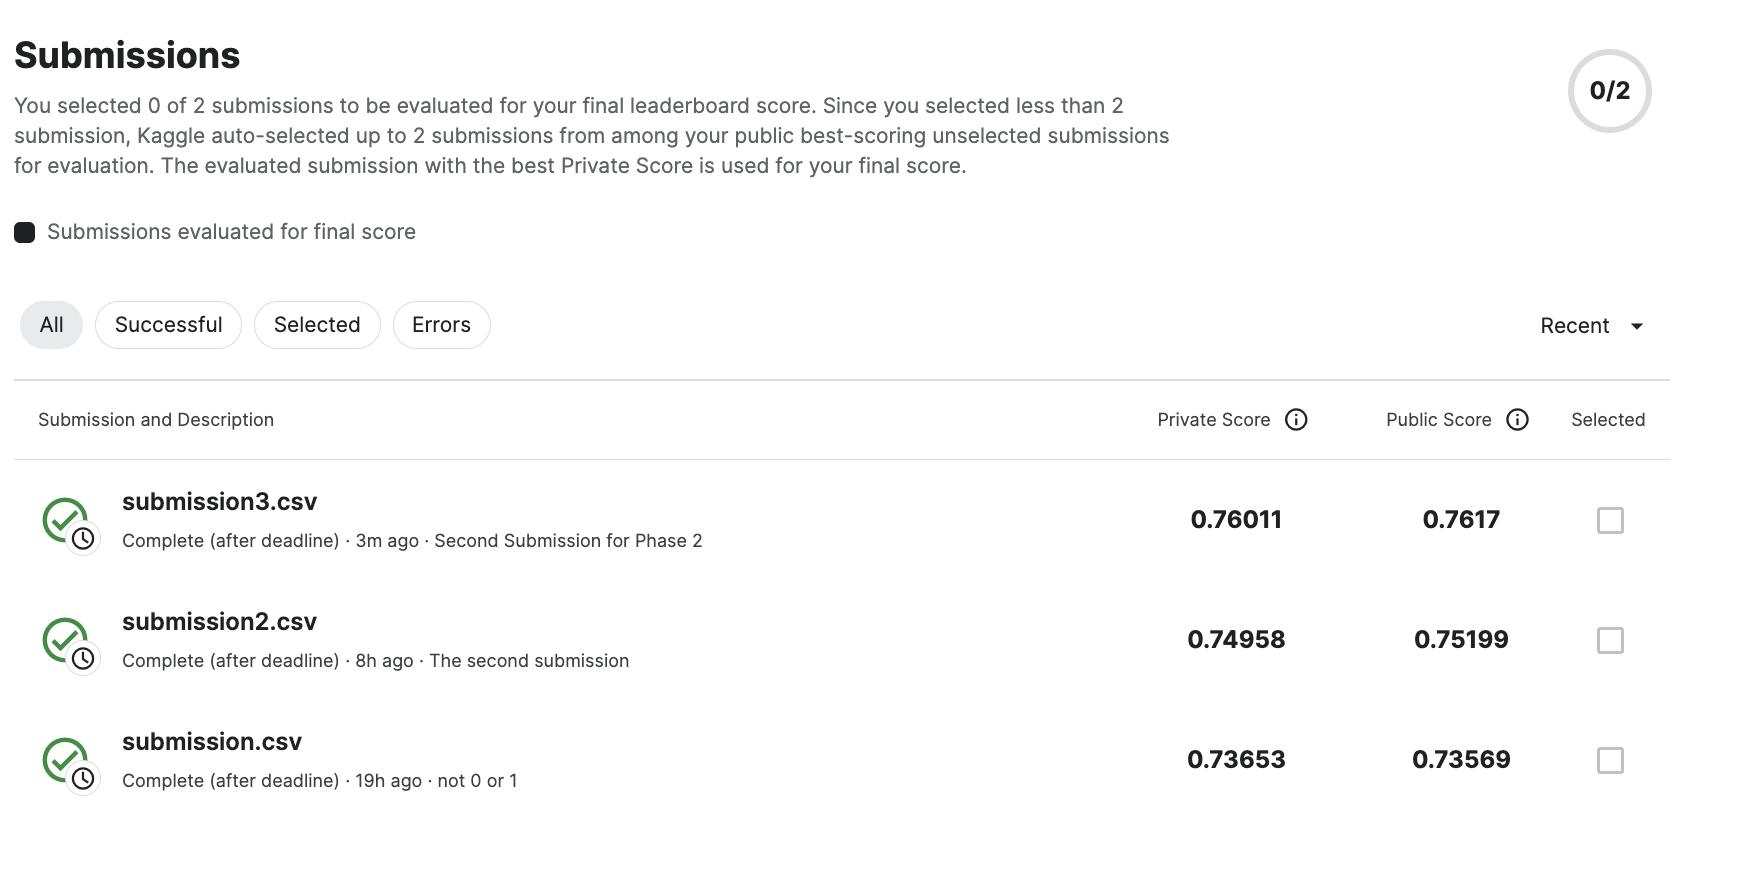

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract

Our goal was to determine how accurately we can predict a new applicant's ability to pay loans. Our area of focus during his week was high level EDA, feature engineering and building a baseline model for our overall goal. From the EDA, we found skewed distributions, correlations which we will utilizemore during phase 2. After EDA and feature engineering, we created 4 data pipeline for char as well as numerical values,with different features and fed it into logistic regression. From this pipeline, we obtained an ROC score of 73.3 in Kaggle and 91.95% in test accuracy.  


## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material.

**Section 3.4**

For feature engineering, first we found 2 skewed attributes from the numerical features and did log transformation on the same. And, we also performed correlation between target variable and predictor variables. In additin, based on null value percentage for variables, we did feature engineering as well. 
Here are the screenshots for correlation and log transoformation.

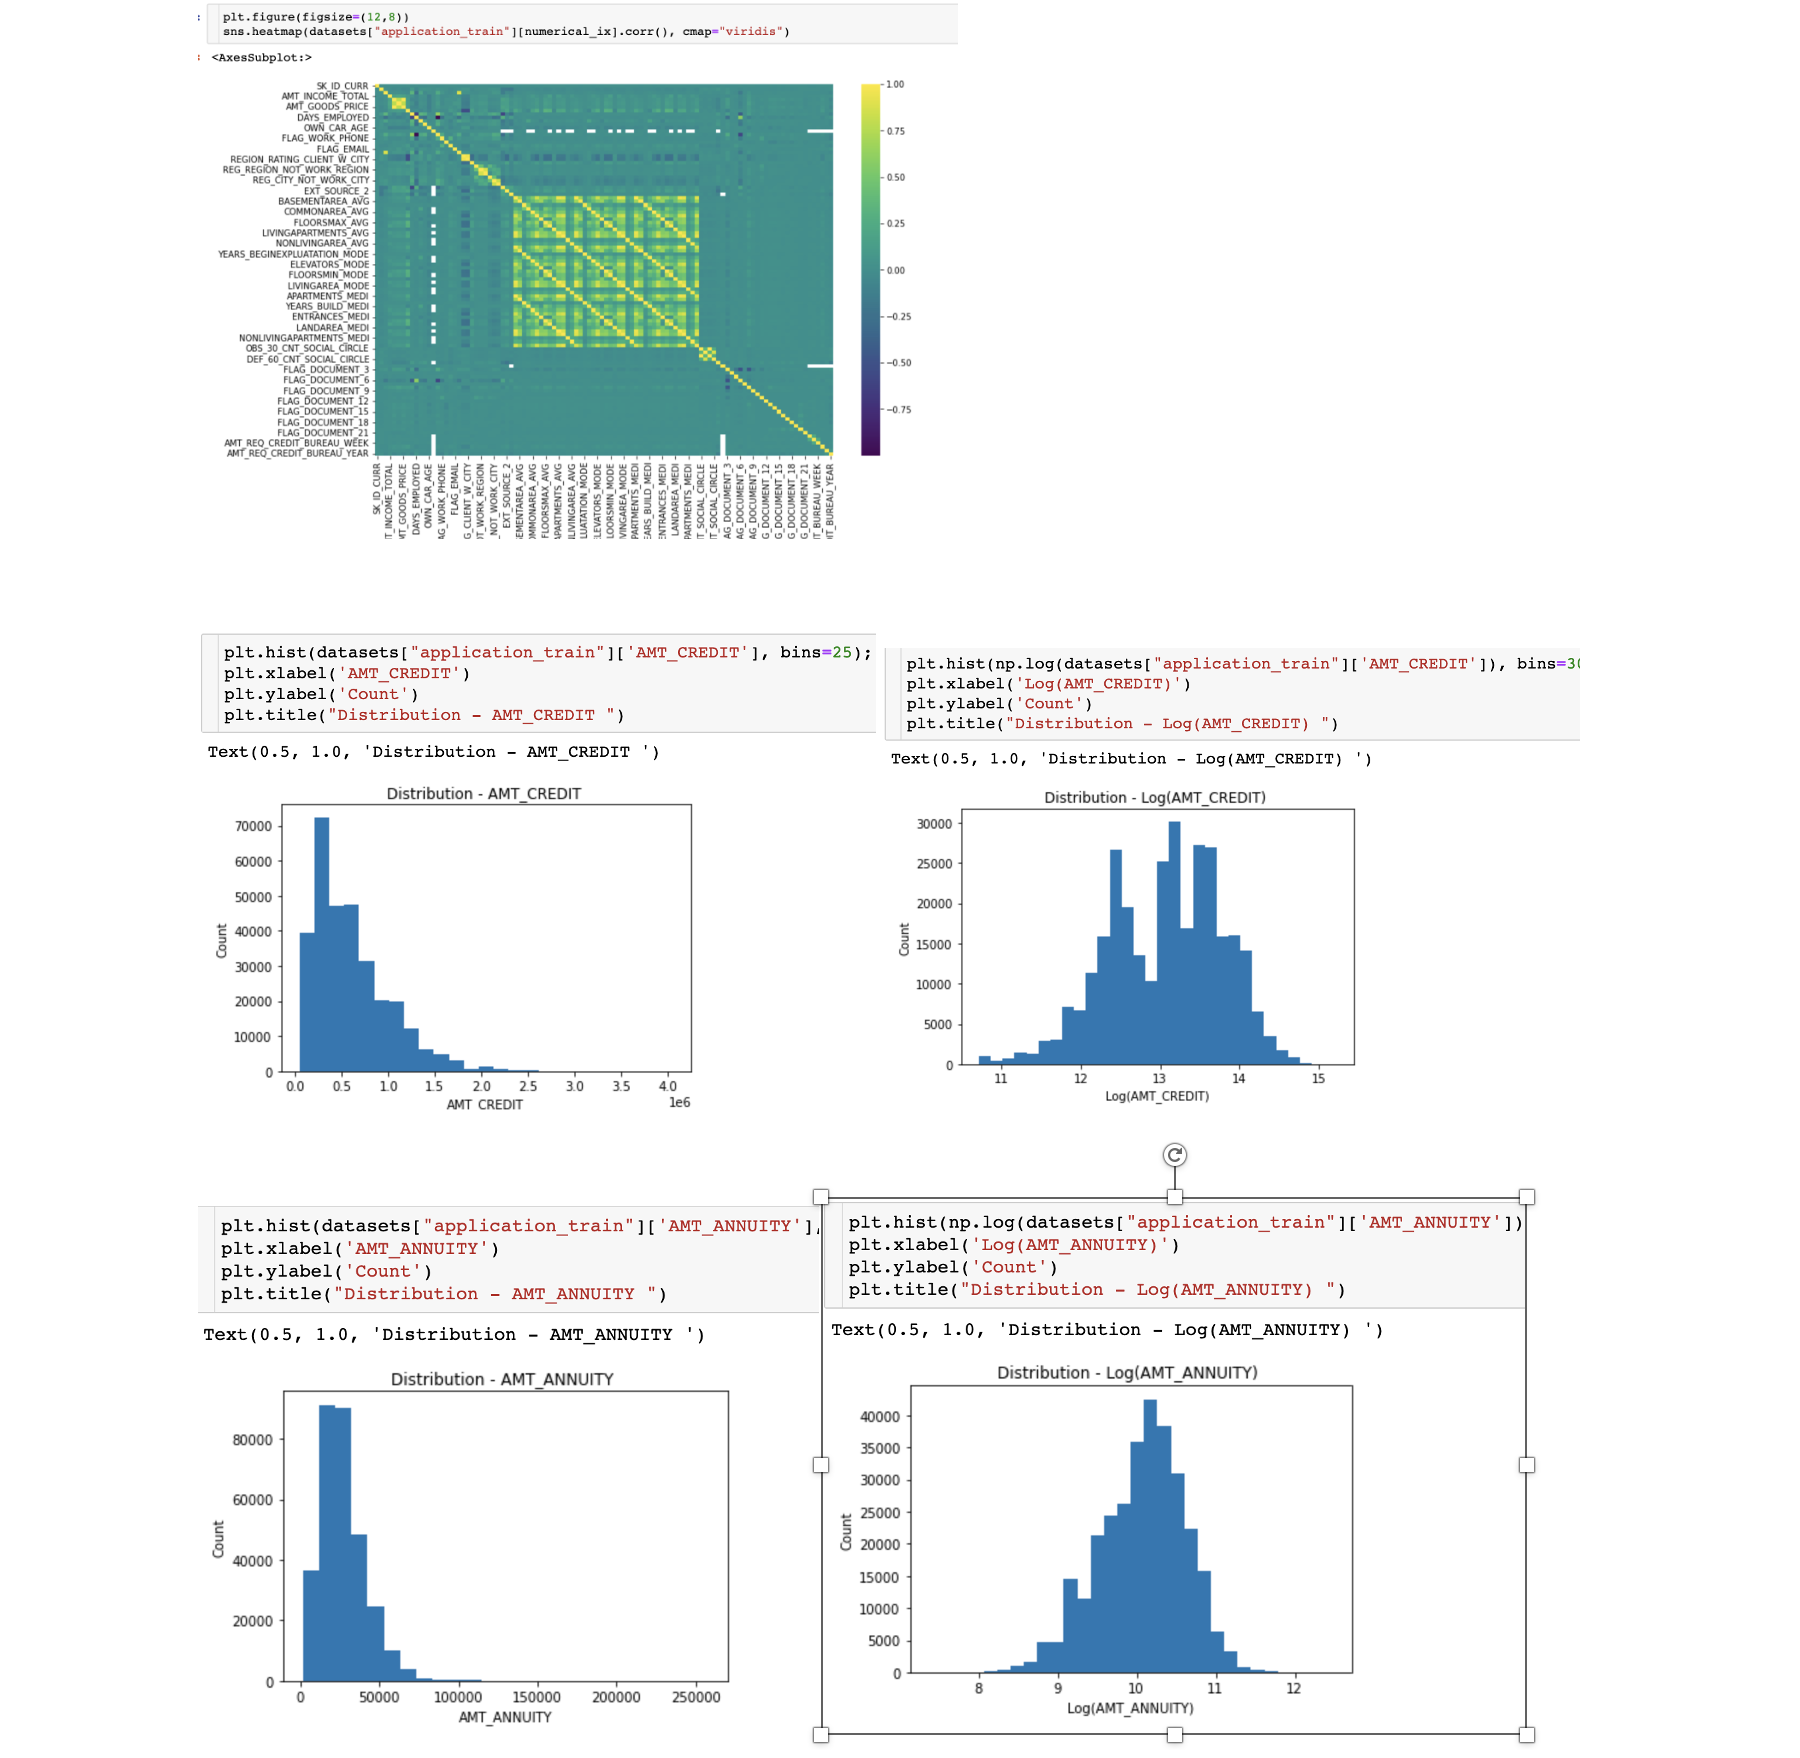
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material

All pipelines are prepared under section 7. 

Our **All Feature** model has all the 120 features (except 'SK_ID_CURR', 'TARGET' )as available in the training set. Then there are 2 set of models where we are selecting the features that we want to use. 1st one, **Baseline with 14 attributes** has 14 attributes, and another one, **Baseline with 79 attributes** has 79 attributes. for model with 14 elements, we used 7 numerical and 7 categorical attributes. For model with 79 attributes, we removed the elements which have more than 50% null values in the the training data. Last model which we used, **Baseline with log features** it has 2 attributes which were log transformed. Apart from that, we used the 79 elements model with it.

Numerical features were standardized using Standard scaler, and we used median to fill in the missing values. As far as categorical data is concerned, We did one hot encoding to standatdize and missing values were filled using the ost frequent values. 

**AUC_ROC score** is used to evaluate our models.

__We have created 3 Logistic regression models:__

    Baseline1_all features 120 raw inputs
    Baseline2_all features 14 inputs
    Baseline3_selected features 79 raw inputs
    Baseline4_selected features 79 raw inputs with a log feature (log AMT_ANNUITY, log AMT_CREDIT)
   
 
 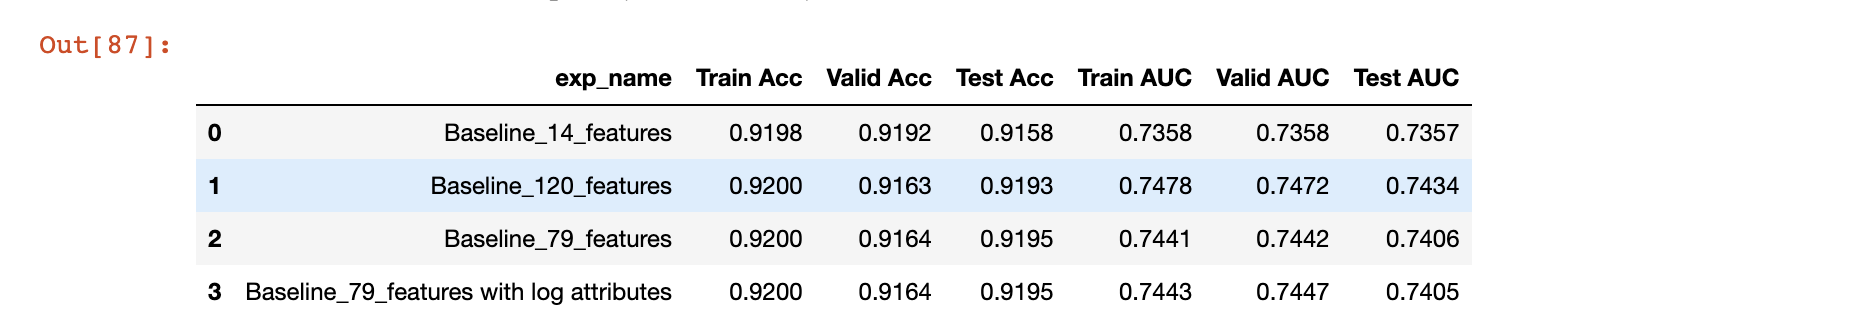
 
 
 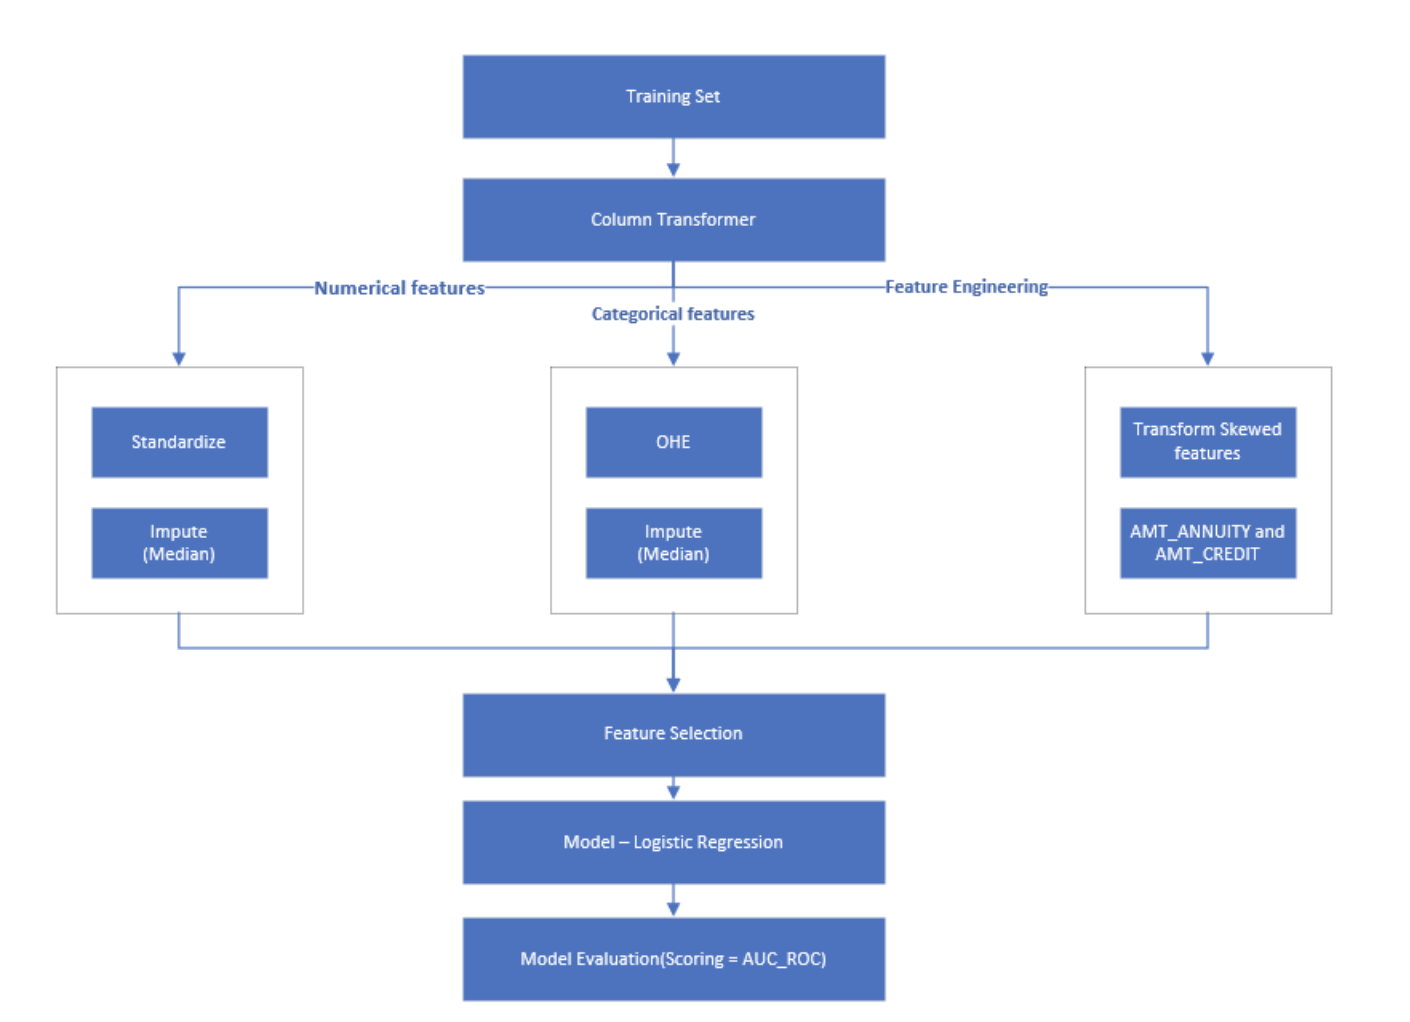
    
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material




 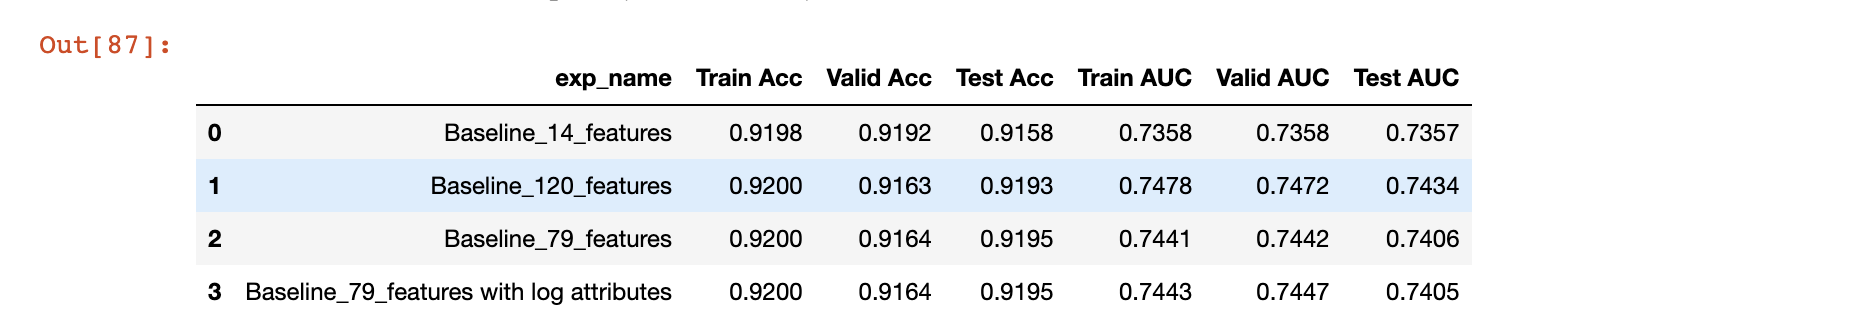

## Discussion

We did 4 experimemts as stated in the picture attached. Except for model with 14 features, 
all other models have training accuracy of 92%. Best validation accuracy was schieved 
for model 3 and 4 and section 7.4 and 7.5. For the scoring, we used AUC score which was 74.34% 
for the model with all attributes.

With more robust feature selection, OHE's, loss functions, and grid paramaters, we think that the score could be improved substantially. We will use our current understanding and inculcalte the learnings and will try to improve our results. 

## Conclusion

In this phase we have understood the dataset by performing EDA where we have checked for the relationship between Target variable and numerical features,categorical features and also checked for the missing values for features.

Upon that, we build 4 pipelines using logistic regression and we have compared all the training and testing accuracies to see which pipeline works best. Our aim in this phase is to achieve best accuracy.

The baseline model with all features has the highest test AUC score in notebook(0.7434) and in Kaggle submission (0.733). We hope for a better score by doing more feature engineering in the next phase.

For the next phase, we will be performing feature engineering on all the data sets to find the important features, perform dimensionality reduction, SVC, and perform feature engineering.

## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

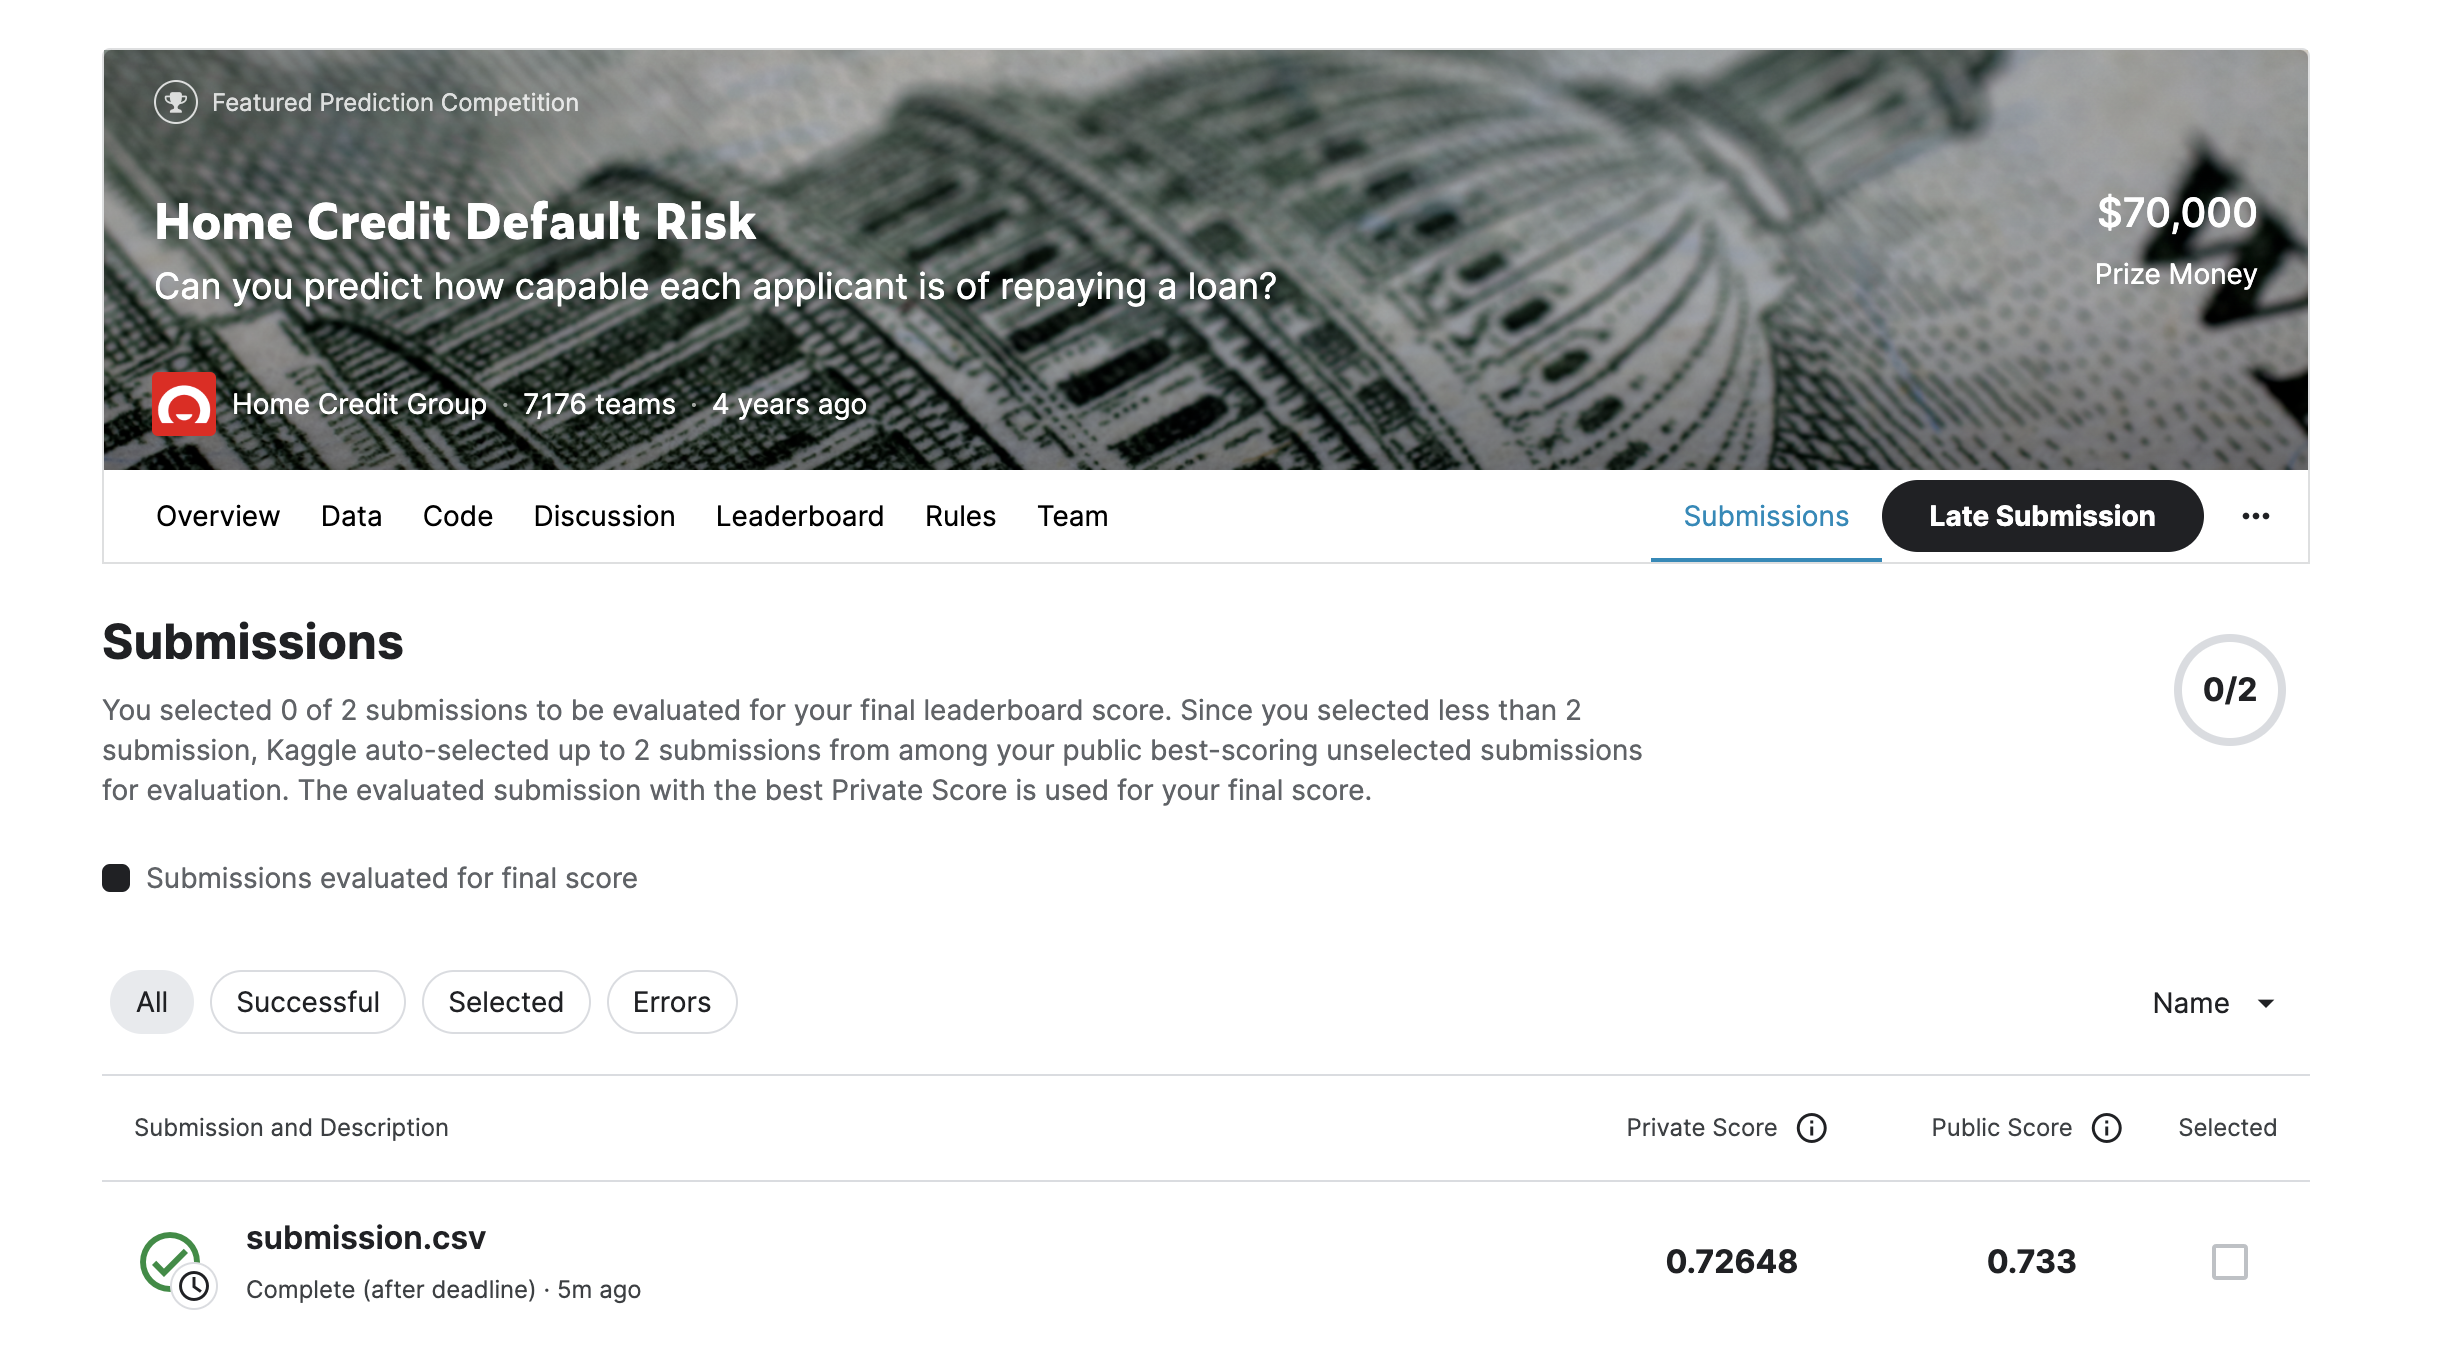

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/